# Data exploration

In this notebook I tried to explore various pairs and compare results of preprocessing

### Load libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os

mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.grid'] = False

In [126]:
import json
from binance.client import Client  # https://python-binance.readthedocs.io/en/latest/

## More data comparsion

I only had close prices of BTC,LTC,ETH,BCH now get some more and check if we can use them

#### Correlation between columns
Next function calculates correlation between columns in pandas df

In [15]:
def get_corr(df, column=str):
    
    """
    Calculates correlation between columns

    Parameters
    ----------
    column: str
        Column name to which corr will be calculated 
    
    df: DataFrame
        DataFrame from which correlations will be calculated
    
    Returns
    -------
    DataFrame with correlations
    
    Example
    --------
    get_corr(binance_df ,"BTCBUSD_close")  
    
    """
    
    correlations = []
    
    for col in list(df.columns):
        
        if column != col:
            
            corr_pair = df[column].corr(df[col])
            print("Corr {}/{} is {}".format(column, col, corr_pair))
            
            corr_dict = {}
            corr_dict.update({'pair':col,'correlation_with_btc':corr_pair}) 
            correlations.append(corr_dict)
            
    return pd.DataFrame(correlations) 

### Get all pairs

Get all pairs from binance to check which can be used

In [15]:
## Load credentials from json file
cr = open('cred.json',) 
data = json.load(cr)  

In [16]:
## Client
binance_client = Client(api_key=data["binance_api_key"], api_secret=data["binance_api_secret"])

In [17]:
def get_busd_pairs():
    
    """
    Get all BUSD pairs
    """
    
    pairs = binance_client.get_all_tickers()
    
    busd_pairs = []
    
    for i in range(len(pairs)):
        symbol = pairs[i]["symbol"]
        
        if "BUSD" == symbol[-4:]:
            busd_pairs.append(symbol)
    
    return busd_pairs

In [18]:
busd_list = get_busd_pairs()

In [19]:
len(busd_list)

226

### Get data for symbols 

In [30]:
def get_data(symbols=list):
    
    """
    Gets data for symbols. There are a lot of pairs that is why this gets only one week of data.

    Parameters
    ----------
    symbols: list
        List of symbols for which we want to get close prices
    
    Returns
    -------
    DataFrame with close prices
    
    """
    
    df_return = pd.DataFrame()
    
    for symbol in symbols:
        
        klines = binance_client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1MINUTE, "20 Jun, 2021", "4 Jul, 2021")
        
        data = pd.DataFrame(klines, columns = ["timestamp", "open", "high", "low", "close", "volume", "close_time", "quote_av", "trades", "tb_base_av", "tb_quote_av", "ignore"])
        data["timestamp"] = pd.to_datetime(data["timestamp"], unit="ms")
        data.set_index("timestamp", inplace=True)
        data = data[["close"]]
        data.rename(columns={"close":f"{symbol}_close"}, inplace=True)

        
        if len(df_return) == 0:
            df_return = data
        else:
            df_return = df_return.join(data, on='timestamp')
    
    df_return = df_return.apply(pd.to_numeric) 
    return df_return



In [31]:
explore_df = get_data(busd_list)

In [32]:
explore_df

BNBBUSD_close  BTCBUSD_close  XRPBUSD_close  \
timestamp                                                          
2021-06-20 00:00:00         334.07       35512.84         0.7584   
2021-06-20 00:01:00         333.32       35419.50         0.7503   
2021-06-20 00:02:00         333.59       35451.89         0.7545   
2021-06-20 00:03:00         335.16       35641.83         0.7600   
2021-06-20 00:04:00         334.43       35606.36         0.7585   
...                            ...            ...            ...   
2021-07-03 23:56:00         298.21       34683.36         0.6728   
2021-07-03 23:57:00         298.29       34675.67         0.6728   
2021-07-03 23:58:00         298.30       34669.58         0.6732   
2021-07-03 23:59:00         298.14       34677.72         0.6736   
2021-07-04 00:00:00         297.57       34623.81         0.6718   

                     ETHBUSD_close  BCHABCBUSD_close  LTCBUSD_close  \
timestamp                                                             
2021-06-20 00:00:00        2165.31               NaN         152.42   
2021-06-20 00:01:00        2158.42               NaN         152.01   
2021-06-20 00:02:00        2162.75               NaN         152.21   
2021-06-20 00:03:00        2172.97               NaN         153.11   
2021-06-20 00:04:00        2169.78               NaN         153.22   
...                            ...               ...            ...   
2021-07-03 23:56:00        2227.35               NaN         140.23   
2021-07-03 23:57:00        2226.55               NaN         140.15   
2021-07-03 23:58:00        2226.47               NaN         140.12   
2021-07-03 23:59:00        2227.59               NaN         140.12   
2021-07-04 00:00:00        2225.31               NaN         139.97   

                     LINKBUSD_close  ETCBUSD_close  TRXBUSD_close  \
timestamp                                                           
2021-06-20 00:00:00          20.283         50.939        0.06838   
2021-06-20 00:01:00          20.175         50.795        0.06816   
2021-06-20 00:02:00          20.196         50.825        0.06822   
2021-06-20 00:03:00          20.287         51.117        0.06850   
2021-06-20 00:04:00          20.300         51.123        0.06844   
...                             ...            ...            ...   
2021-07-03 23:56:00          18.523         56.888        0.06680   
2021-07-03 23:57:00          18.522         56.888        0.06680   
2021-07-03 23:58:00          18.536         56.873        0.06686   
2021-07-03 23:59:00          18.536         56.879        0.06686   
2021-07-04 00:00:00          18.541         56.766        0.06677   

                     EOSBUSD_close  ...  STMXBUSD_close  HNTBUSD_close  \
timestamp                           ...                                  
2021-06-20 00:00:00         4.4509  ...         0.01894         12.571   
2021-06-20 00:01:00         4.4400  ...         0.01887         12.580   
2021-06-20 00:02:00         4.4412  ...         0.01885         12.553   
2021-06-20 00:03:00         4.4645  ...         0.01893         12.608   
2021-06-20 00:04:00         4.4624  ...         0.01897         12.611   
...                            ...  ...             ...            ...   
2021-07-03 23:56:00         4.0420  ...         0.02149         13.320   
2021-07-03 23:57:00         4.0428  ...         0.02164         13.320   
2021-07-03 23:58:00         4.0482  ...         0.02164         13.263   
2021-07-03 23:59:00         4.0531  ...         0.02147         13.340   
2021-07-04 00:00:00         4.0475  ...         0.02257         13.339   

                     FTTBUSD_close  DOCKBUSD_close  ERNBUSD_close  \
timestamp                                                           
2021-06-20 00:00:00          29.44         0.09444            NaN   
2021-06-20 00:01:00          29.40         0.09444            NaN   
2021-06-20 00:02:00          29.37         0.09359            NaN   
2021-0

In [33]:
explore_df.dropna(axis='columns', inplace=True)

Calculate corr of all pairs

In [34]:
corr_df = get_corr(explore_df ,"BTCBUSD_close") 

Corr BTCBUSD_close/BNBBUSD_close is 0.7286767353835468
Corr BTCBUSD_close/XRPBUSD_close is 0.7783405931222024
Corr BTCBUSD_close/ETHBUSD_close is 0.8216666357441311
Corr BTCBUSD_close/LTCBUSD_close is 0.835511039577811
Corr BTCBUSD_close/LINKBUSD_close is 0.8591285957241025
Corr BTCBUSD_close/ETCBUSD_close is 0.6245228365441439
Corr BTCBUSD_close/TRXBUSD_close is 0.6880424525698176
Corr BTCBUSD_close/EOSBUSD_close is 0.8171081106203121
Corr BTCBUSD_close/XLMBUSD_close is 0.8775517957935794
Corr BTCBUSD_close/ADABUSD_close is 0.8008090005433202
Corr BTCBUSD_close/BCHBUSD_close is 0.8525764491491581
Corr BTCBUSD_close/QTUMBUSD_close is 0.7382629419860155
Corr BTCBUSD_close/VETBUSD_close is 0.7694242537114788
Corr BTCBUSD_close/EURBUSD_close is -0.14580655688621427
Corr BTCBUSD_close/ICXBUSD_close is 0.6523178509474772
Corr BTCBUSD_close/BNTBUSD_close is 0.841138383091545
Corr BTCBUSD_close/ATOMBUSD_close is 0.7831566125240743
Corr BTCBUSD_close/DASHBUSD_close is 0.7730629688032791
Corr B

Lets check how correlatoins look like plotted (similar and different) 

TWTBUSD_close correlation is 0.9084862137358767

AUDBUSD_close correlation is -0.13328093134182173


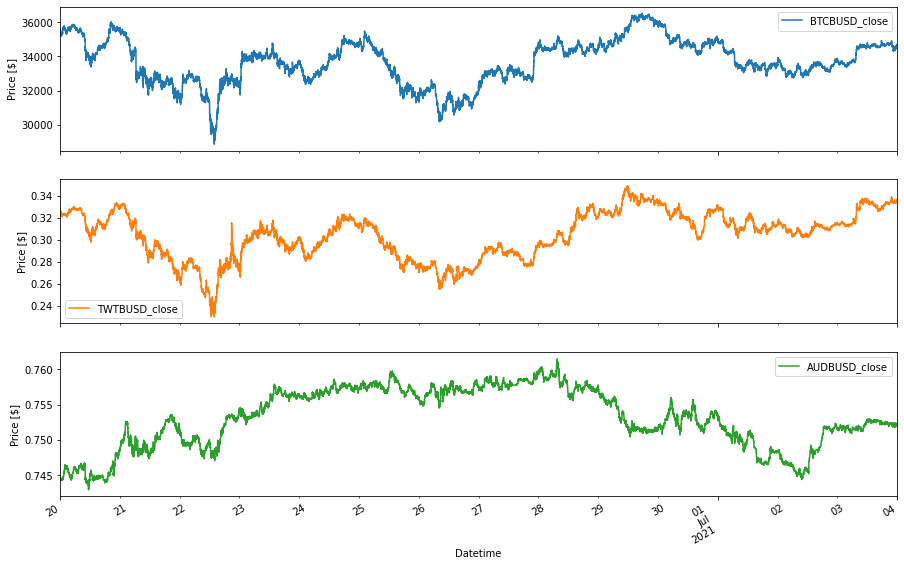

In [42]:
explore_df[["BTCBUSD_close","TWTBUSD_close","AUDBUSD_close"]].plot(subplots=True, xlabel="Datetime", ylabel="Price [$]")
plt.show()

In [38]:
ordered_df = corr_df.groupby("correlation_with_btc").sum().reset_index()
ordered_df.sort_values("correlation_with_btc", ascending=False, inplace=True)

In [39]:
ordered_df

correlation_with_btc            pair
190              0.908486   TWTBUSD_close
189              0.895470   TRBBUSD_close
188              0.877552   XLMBUSD_close
187              0.875971   DGBBUSD_close
186              0.866240  ALGOBUSD_close
..                    ...             ...
4               -0.010913  TUSDBUSD_close
3               -0.084367   MIRBUSD_close
2               -0.133281   AUDBUSD_close
1               -0.145807   EURBUSD_close
0               -0.287440  USDCBUSD_close

[191 rows x 2 columns]

Take first thirty and get more data for them

In [52]:
list(ordered_df.pair[:30])

['TWTBUSD_close',
 'TRBBUSD_close',
 'XLMBUSD_close',
 'DGBBUSD_close',
 'ALGOBUSD_close',
 'LINKBUSD_close',
 'BATBUSD_close',
 'BCHBUSD_close',
 'FILBUSD_close',
 'UNIBUSD_close',
 'BNTBUSD_close',
 'SOLBUSD_close',
 'SUSHIBUSD_close',
 'CRVBUSD_close',
 'LTCBUSD_close',
 'ETHBUSD_close',
 'YFIBUSD_close',
 'BTTBUSD_close',
 'EOSBUSD_close',
 'ZRXBUSD_close',
 'BANDBUSD_close',
 'OCEANBUSD_close',
 'ONEBUSD_close',
 'ZECBUSD_close',
 'ADABUSD_close',
 'GTCBUSD_close',
 'WINBUSD_close',
 'LRCBUSD_close',
 'ATOMBUSD_close',
 'XRPBUSD_close']

#### Load data

In [3]:
pairs_to_explore = ['BTCBUSD','TWTBUSD','TRBBUSD','XLMBUSD','DGBBUSD','ALGOBUSD','LINKBUSD','BATBUSD','BCHBUSD','FILBUSD','UNIBUSD','BNTBUSD','SOLBUSD','SUSHIBUSD','CRVBUSD','LTCBUSD','ETHBUSD','YFIBUSD','BTTBUSD','EOSBUSD','ZRXBUSD','BANDBUSD','OCEANBUSD','ONEBUSD','ZECBUSD','ADABUSD','GTCBUSD','WINBUSD','LRCBUSD','ATOMBUSD','XRPBUSD']

In [4]:
len(pairs_to_explore)

31

In [5]:
binance_df = pd.DataFrame()

for ratio in pairs_to_explore:
    
    dataset = "crypto_data/final_data_05_07_2021/"+ratio+"-1m-data.csv"
    df = pd.read_csv(dataset, index_col="timestamp")
    df.rename(columns={"close": f"{ratio}_close"}, inplace=True)

    df = df[[f"{ratio}_close"]]
    
    df = df[(df.index < "2021-07-01 13:00:00")] 


    if len(binance_df) == 0:
        binance_df = df
    else:
        binance_df = binance_df.join(df, on='timestamp')

In [6]:
binance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216177 entries, 2021-02-01 00:00:00 to 2021-07-01 12:59:00
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BTCBUSD_close    216177 non-null  float64
 1   TWTBUSD_close    216177 non-null  float64
 2   TRBBUSD_close    216177 non-null  float64
 3   XLMBUSD_close    216177 non-null  float64
 4   DGBBUSD_close    216177 non-null  float64
 5   ALGOBUSD_close   216177 non-null  float64
 6   LINKBUSD_close   216177 non-null  float64
 7   BATBUSD_close    216177 non-null  float64
 8   BCHBUSD_close    216177 non-null  float64
 9   FILBUSD_close    216177 non-null  float64
 10  UNIBUSD_close    216177 non-null  float64
 11  BNTBUSD_close    216177 non-null  float64
 12  SOLBUSD_close    216177 non-null  float64
 13  SUSHIBUSD_close  216177 non-null  float64
 14  CRVBUSD_close    216177 non-null  float64
 15  LTCBUSD_close    216177 non-null  float64
 16  ETHBUSD_clos

In [7]:
binance_df

BTCBUSD_close  TWTBUSD_close  TRBBUSD_close  \
timestamp                                                          
2021-02-01 00:00:00       33071.43         0.2908         30.129   
2021-02-01 00:01:00       33072.65         0.2908         30.129   
2021-02-01 00:02:00       32912.95         0.2908         30.129   
2021-02-01 00:03:00       32898.90         0.2908         30.129   
2021-02-01 00:04:00       32893.26         0.2908         30.129   
...                            ...            ...            ...   
2021-07-01 12:55:00       33661.21         0.3235         37.697   
2021-07-01 12:56:00       33682.23         0.3235         37.643   
2021-07-01 12:57:00       33741.92         0.3242         37.671   
2021-07-01 12:58:00       33671.80         0.3226         37.671   
2021-07-01 12:59:00       33654.74         0.3238         37.671   

                     XLMBUSD_close  DGBBUSD_close  ALGOBUSD_close  \
timestamp                                                           
2021-02-01 00:00:00        0.30543        0.02840          0.6478   
2021-02-01 00:01:00        0.30508        0.02840          0.6478   
2021-02-01 00:02:00        0.30282        0.02826          0.6402   
2021-02-01 00:03:00        0.30282        0.02821          0.6400   
2021-02-01 00:04:00        0.30282        0.02811          0.6417   
...                            ...            ...             ...   
2021-07-01 12:55:00        0.26674        0.04535          0.8456   
2021-07-01 12:56:00        0.26710        0.04538          0.8451   
2021-07-01 12:57:00        0.26772        0.04548          0.8461   
2021-07-01 12:58:00        0.26741        0.04540          0.8438   
2021-07-01 12:59:00        0.26761        0.04540          0.8438   

                     LINKBUSD_close  BATBUSD_close  BCHBUSD_close  \
timestamp                                                           
2021-02-01 00:00:00         22.4409         0.3021         399.50   
2021-02-01 00:01:00         22.4652         0.3021         399.00   
2021-02-01 00:02:00         22.4117         0.3005         396.93   
2021-02-01 00:03:00         22.4300         0.3005         397.35   
2021-02-01 00:04:00         22.3846         0.3005         397.26   
...                             ...            ...            ...   
2021-07-01 12:55:00         18.1560         0.5759         494.81   
2021-07-01 12:56:00         18.1810         0.5753         494.50   
2021-07-01 12:57:00         18.2210         0.5787         494.81   
2021-07-01 12:58:00         18.1690         0.5767         494.22   
2021-07-01 12:59:00         18.1460         0.5783         494.13   

                     FILBUSD_close  ...  BANDBUSD_close  OCEANBUSD_close  \
timestamp                           ...                                    
2021-02-01 00:00:00        22.2778  ...             NaN           0.5470   
2021-02-01 00:01:00        22.2778  ...             NaN           0.5452   
2021-02-01 00:02:00        22.2318  ...             NaN           0.5433   
2021-02-01 00:03:00        22.1957  ...             NaN           0.5433   
2021-02-01 00:04:00        22.1957  ...             NaN           0.5424   
...                            ...  ...             ...              ...   
2021-07-01 12:55:00        57.5500  ...           5.500           0.4401   
2021-07-01 12:56:00        57.5700  ...           5.494           0.4401   
2021-07-01 12:57:00        57.7500  ...           5.508           0.4415   
2021-07-01 12:58:00        57.6500  ...           5.508           0.4415   
2021-07-01 12:59:00        57.5800  ...           5.516           0.4415   

                     ONEBUSD_close  ZECBUSD_close  ADABUSD_close  \
timestamp                                                          
2021-02-01 00:00:00       0.008652          85.63        0.34473   
2021-02-01 00:01:00       0.008652          85.62        0.34413   
2021-02-01 00:02:00       0.008681          85.21        0.34302   
2021-02-01 

In [8]:
binance_df.describe()

BTCBUSD_close  TWTBUSD_close  TRBBUSD_close  XLMBUSD_close  \
count   216177.00000  216177.000000  216177.000000  216177.000000   
mean     48114.12975       0.591984      61.447861       0.440168   
std       9384.01731       0.183367      23.838962       0.108781   
min      28860.09000       0.230000      27.027000       0.199540   
25%      37930.03000       0.494100      42.880000       0.380330   
50%      49735.22000       0.588200      54.516000       0.413650   
75%      56629.16000       0.695000      75.942000       0.502850   
max      64842.71000       1.301700     164.236000       0.796900   

       DGBBUSD_close  ALGOBUSD_close  LINKBUSD_close  BATBUSD_close  \
count  216177.000000   216177.000000   216177.000000  216177.000000   
mean        0.077876        1.158394       30.382647       0.880337   
std         0.032234        0.231497        7.427034       0.335173   
min         0.027230        0.618900       15.001000       0.291400   
25%         0.056260        0.995500       25.514400       0.602500   
50%         0.068000        1.135800       29.450000       0.771800   
75%         0.088360        1.352600       33.782500       1.188600   
max         0.183020        1.844800       53.041000       1.647000   

       BCHBUSD_close  FILBUSD_close  ...  BANDBUSD_close  OCEANBUSD_close  \
count  216177.000000  216177.000000  ...   183856.000000    216177.000000   
mean      689.852686      90.416512  ...       12.562942         1.062732   
std       248.305036      50.028949  ...        4.356228         0.409759   
min       388.840000      22.046300  ...        4.075000         0.323200   
25%       520.300000      44.304700  ...        8.131000         0.635400   
50%       608.980000      72.900000  ...       13.517000         1.120100   
75%       758.870000     143.000000  ...       16.290000         1.417500   
max      1642.590000     237.500000  ...       23.228000         1.938500   

       ONEBUSD_close  ZECBUSD_close  ADABUSD_close  GTCBUSD_close  \
count  216177.000000  216177.000000  216177.000000   30420.000000   
mean        0.093353     168.943094       1.289546       8.309449   
std         0.052163      58.271866       0.332621       2.373137   
min         0.008170      84.090000       0.333750       4.640000   
25%         0.040878     128.530000       1.129170       6.020000   
50%         0.094660     150.010000       1.256800       7.930000   
75%         0.136940     203.680000       1.486200      10.250000   
max         0.223314     371.320000       2.461900      18.160000   

       WINBUSD_close  LRCBUSD_close  ATOMBUSD_close  XRPBUSD_close  
count   36180.000000   216177.00000   216177.000000  216177.000000  
mean        0.000433        0.50734       18.256147       0.861752  
std         0.000044        0.14448        4.955177       0.402986  
min         0.000285        0.17472        7.838000       0.343090  
25%         0.000396        0.38380       13.759000       0.516690  
50%         0.000440        0.54468       19.243000       0.753300  
75%         0.000463        0.58971       21.784000       1.138290  
max         0.000573        0.90343       32.125000       1.965170  

[8 rows x 31 columns]

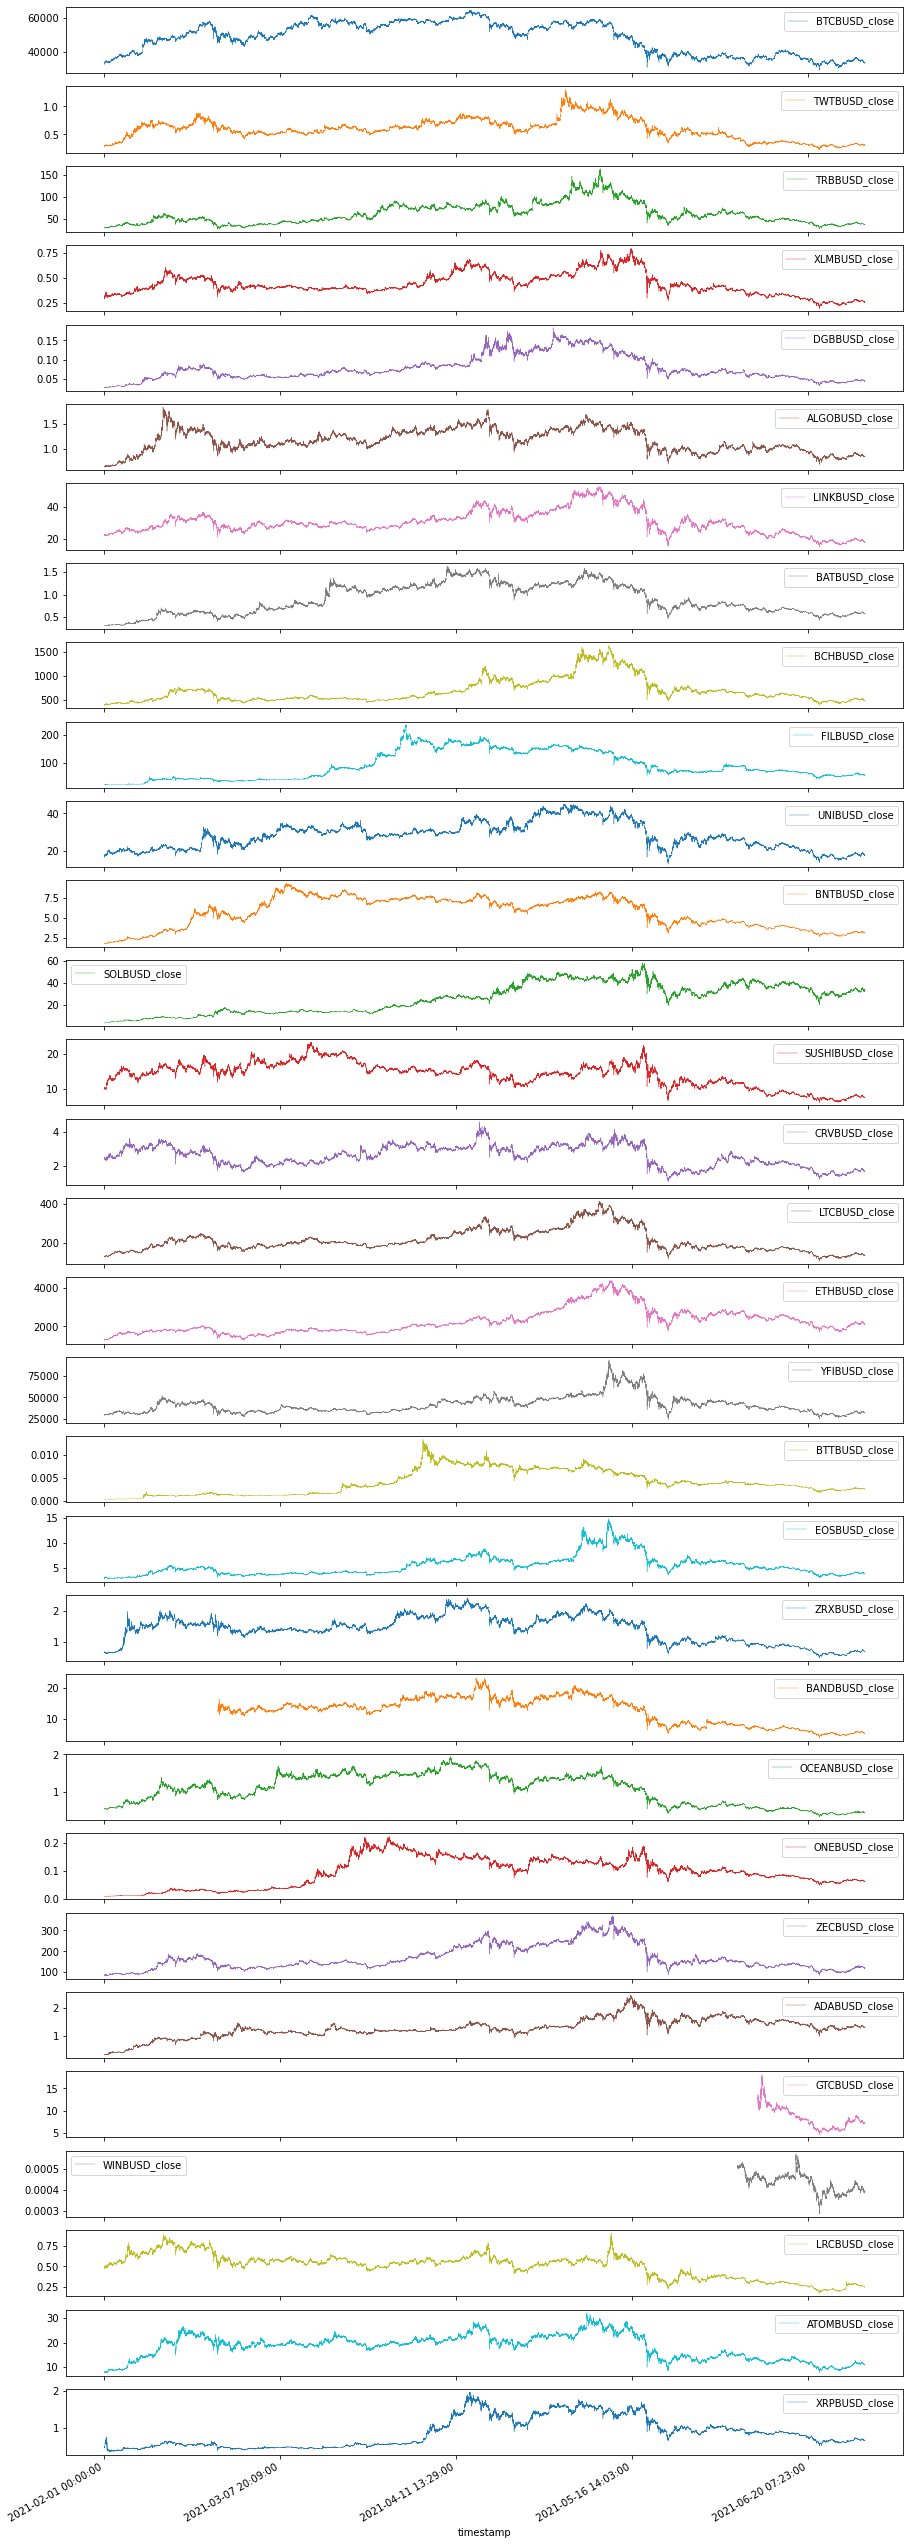

In [9]:
binance_df.plot(linewidth=0.4, subplots=True, figsize=(15, 50))
plt.show()

In [16]:
corr_final_df = get_corr(binance_df ,"BTCBUSD_close") 

Corr BTCBUSD_close/TWTBUSD_close is 0.7433942503895177
Corr BTCBUSD_close/TRBBUSD_close is 0.5090523096033864
Corr BTCBUSD_close/XLMBUSD_close is 0.6228434339030299
Corr BTCBUSD_close/DGBBUSD_close is 0.5750560235156283
Corr BTCBUSD_close/ALGOBUSD_close is 0.8093613355874253
Corr BTCBUSD_close/LINKBUSD_close is 0.6481267883720242
Corr BTCBUSD_close/BATBUSD_close is 0.7324630554714208
Corr BTCBUSD_close/BCHBUSD_close is 0.340989785941217
Corr BTCBUSD_close/FILBUSD_close is 0.5945568063065441
Corr BTCBUSD_close/UNIBUSD_close is 0.7230857837278153
Corr BTCBUSD_close/BNTBUSD_close is 0.8507552147977335
Corr BTCBUSD_close/SOLBUSD_close is -0.13921276889518364
Corr BTCBUSD_close/SUSHIBUSD_close is 0.7349761068821723
Corr BTCBUSD_close/CRVBUSD_close is 0.6670546736014539
Corr BTCBUSD_close/LTCBUSD_close is 0.6530631931511373
Corr BTCBUSD_close/ETHBUSD_close is 0.05206876692380814
Corr BTCBUSD_close/YFIBUSD_close is 0.2801159825990584
Corr BTCBUSD_close/BTTBUSD_close is 0.4599375087444512
Corr

In [17]:
ordered_final_df = corr_final_df.groupby("correlation_with_btc").sum().reset_index()
ordered_final_df.sort_values("correlation_with_btc", ascending=False, inplace=True)

In [18]:
ordered_final_df

correlation_with_btc             pair
29              0.966011  OCEANBUSD_close
28              0.935256   BANDBUSD_close
27              0.881994    ZRXBUSD_close
26              0.858886   ATOMBUSD_close
25              0.850755    BNTBUSD_close
24              0.809361   ALGOBUSD_close
23              0.743394    TWTBUSD_close
22              0.735296    GTCBUSD_close
21              0.734976  SUSHIBUSD_close
20              0.732463    BATBUSD_close
19              0.723086    UNIBUSD_close
18              0.704982    LRCBUSD_close
17              0.703787    WINBUSD_close
16              0.667055    CRVBUSD_close
15              0.653063    LTCBUSD_close
14              0.648127   LINKBUSD_close
13              0.622843    XLMBUSD_close
12              0.594557    FILBUSD_close
11              0.575056    DGBBUSD_close
10              0.545452    ZECBUSD_close
9               0.509052    TRBBUSD_close
8               0.461548    ONEBUSD_close
7               0.459938    BTTBUSD_close
6               0.340990    BCHBUSD_close
5               0.304668    EOSBUSD_close
4               0.280116    YFIBUSD_close
3               0.252716    XRPBUSD_close
2               0.052069    ETHBUSD_close
1              -0.086180    ADABUSD_close
0              -0.139213    SOLBUSD_close

In [19]:
binance_df = binance_df[list(ordered_final_df.pair[:10])]

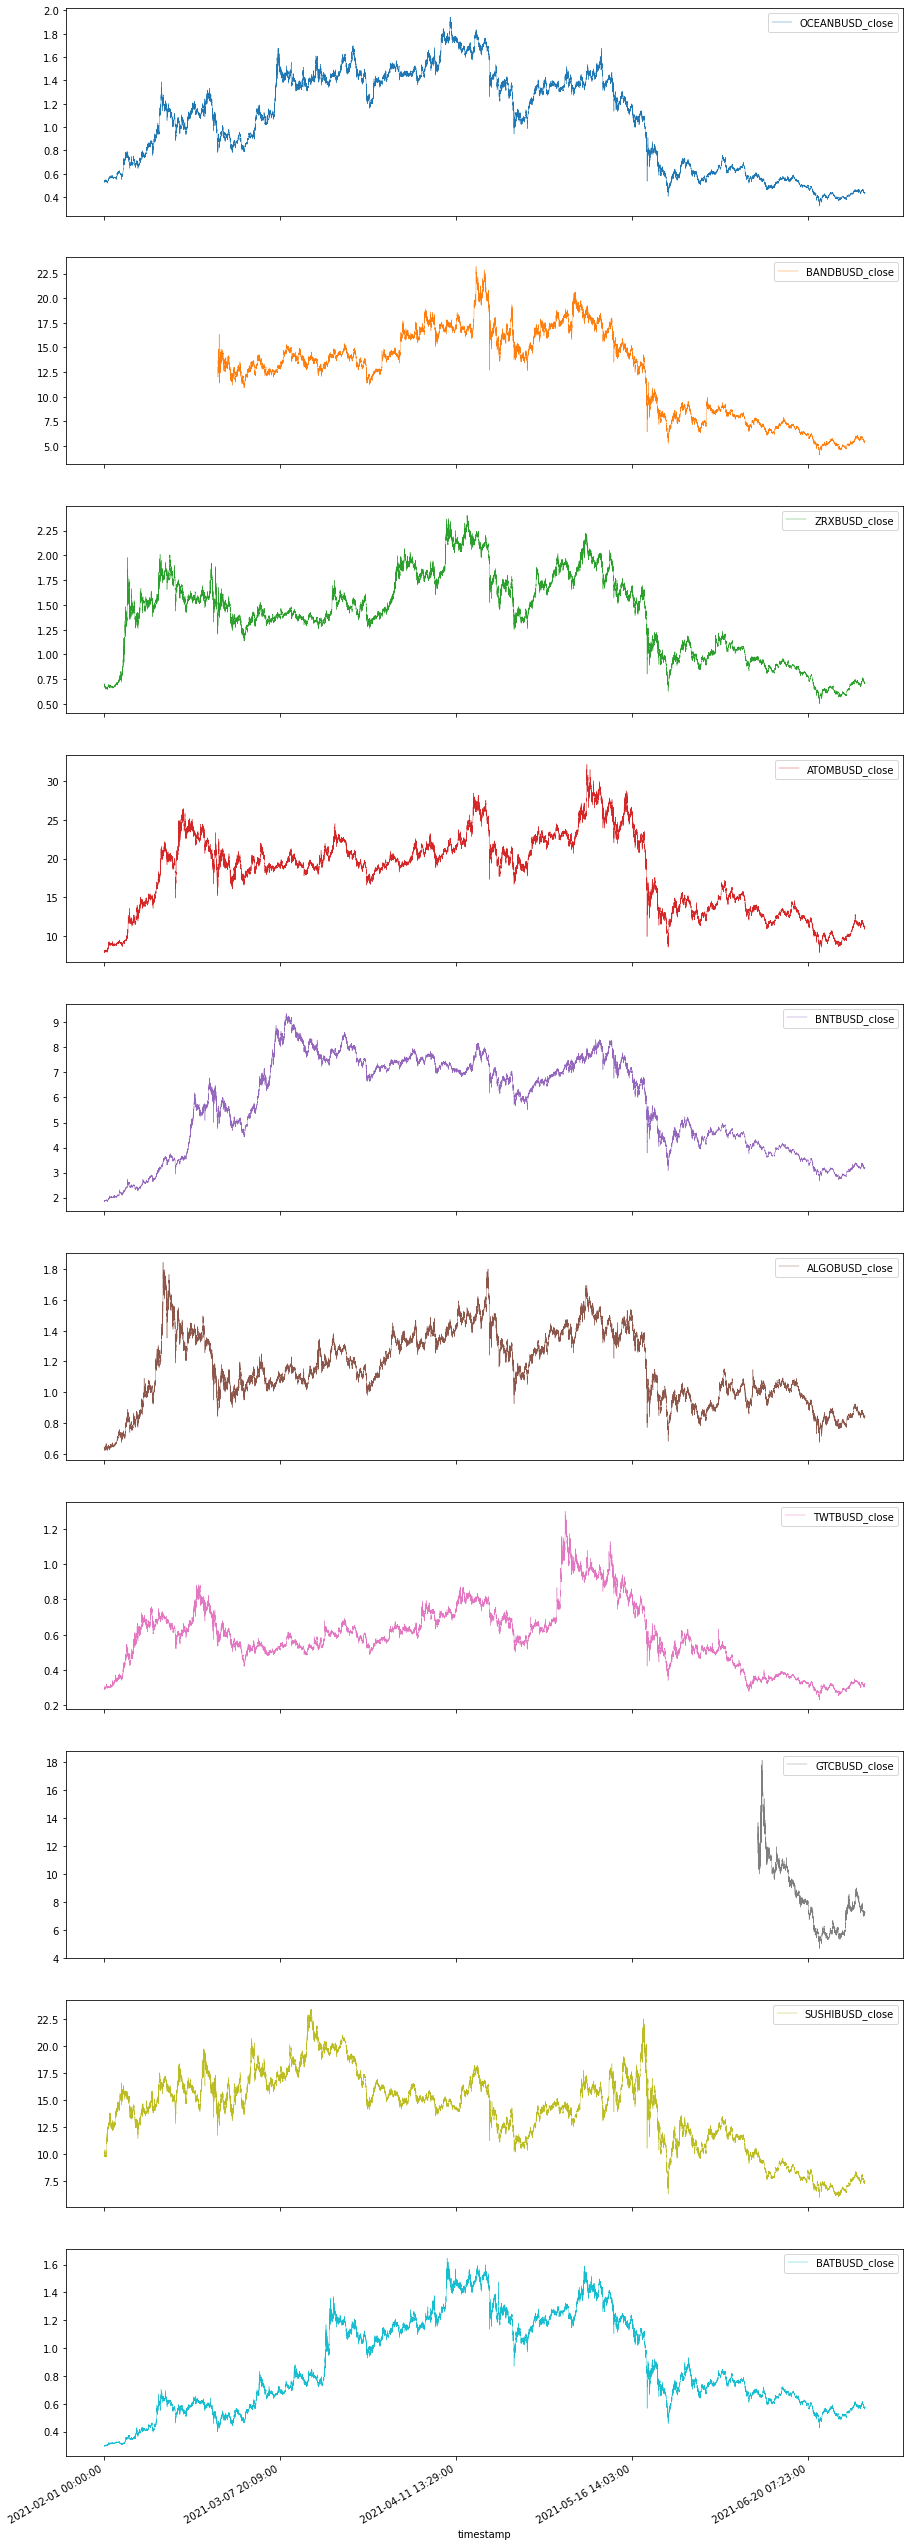

In [20]:
binance_df.plot(linewidth=0.4, subplots=True, figsize=(15, 50))
plt.show()

In [21]:
binance_df.describe()

OCEANBUSD_close  BANDBUSD_close  ZRXBUSD_close  ATOMBUSD_close  \
count    216177.000000   183856.000000  216177.000000   216177.000000   
mean          1.062732       12.562942       1.402031       18.256147   
std           0.409759        4.356228       0.423119        4.955177   
min           0.323200        4.075000       0.499100        7.838000   
25%           0.635400        8.131000       1.039800       13.759000   
50%           1.120100       13.517000       1.437700       19.243000   
75%           1.417500       16.290000       1.714000       21.784000   
max           1.938500       23.228000       2.403700       32.125000   

       BNTBUSD_close  ALGOBUSD_close  TWTBUSD_close  GTCBUSD_close  \
count  216177.000000   216177.000000  216177.000000   30420.000000   
mean        5.709224        1.158394       0.591984       8.309449   
std         1.896858        0.231497       0.183367       2.373137   
min         1.827600        0.618900       0.230000       4.640000   
25%         4.017700        0.995500       0.494100       6.020000   
50%         6.120700        1.135800       0.588200       7.930000   
75%         7.392400        1.352600       0.695000      10.250000   
max         9.363300        1.844800       1.301700      18.160000   

       SUSHIBUSD_close  BATBUSD_close  
count    216177.000000  216177.000000  
mean         14.100699       0.880337  
std           3.556966       0.335173  
min           6.002000       0.291400  
25%          11.761000       0.602500  
50%          14.694000       0.771800  
75%          16.394000       1.188600  
max          23.411000       1.647000

In [22]:
binance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216177 entries, 2021-02-01 00:00:00 to 2021-07-01 12:59:00
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   OCEANBUSD_close  216177 non-null  float64
 1   BANDBUSD_close   183856 non-null  float64
 2   ZRXBUSD_close    216177 non-null  float64
 3   ATOMBUSD_close   216177 non-null  float64
 4   BNTBUSD_close    216177 non-null  float64
 5   ALGOBUSD_close   216177 non-null  float64
 6   TWTBUSD_close    216177 non-null  float64
 7   GTCBUSD_close    30420 non-null   float64
 8   SUSHIBUSD_close  216177 non-null  float64
 9   BATBUSD_close    216177 non-null  float64
dtypes: float64(10)
memory usage: 18.1+ MB


In [23]:
binance_symbols = list(binance_df.columns)

Get pairs without _close to load them

In [24]:
for i in range(len(binance_symbols)):
    
    head = binance_symbols[i].partition("_")
    
    binance_symbols[i] = head[0]

In [25]:
binance_symbols.insert(0, "BTCBUSD")

In [26]:
binance_symbols

['BTCBUSD',
 'OCEANBUSD',
 'BANDBUSD',
 'ZRXBUSD',
 'ATOMBUSD',
 'BNTBUSD',
 'ALGOBUSD',
 'TWTBUSD',
 'GTCBUSD',
 'SUSHIBUSD',
 'BATBUSD']

### Loading saved datasets

#### Loading binance dataset


In [59]:
binance_symbols = ['BTCBUSD',
 'OCEANBUSD',
 'ZRXBUSD',
 'ATOMBUSD',
 'BNTBUSD',
 'ALGOBUSD',
 'TWTBUSD',
 'SUSHIBUSD',
 'BATBUSD']

In [60]:
main_df = pd.DataFrame()

for ratio in binance_symbols:
    
    dataset = "crypto_data/final_data_05_07_2021/"+ratio+"-1m-data.csv"
    df = pd.read_csv(dataset, index_col="timestamp")
    df.rename(columns={"close": f"{ratio}_close"}, inplace=True)

    df = df[[f"{ratio}_close"]]
    
    df = df[(df.index < "2021-07-01 13:00:00")] 
    
    if len(main_df) == 0:
        main_df = df
    else:
        main_df = main_df.join(df, on='timestamp')
        


In [61]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216177 entries, 2021-02-01 00:00:00 to 2021-07-01 12:59:00
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BTCBUSD_close    216177 non-null  float64
 1   OCEANBUSD_close  216177 non-null  float64
 2   ZRXBUSD_close    216177 non-null  float64
 3   ATOMBUSD_close   216177 non-null  float64
 4   BNTBUSD_close    216177 non-null  float64
 5   ALGOBUSD_close   216177 non-null  float64
 6   TWTBUSD_close    216177 non-null  float64
 7   SUSHIBUSD_close  216177 non-null  float64
 8   BATBUSD_close    216177 non-null  float64
dtypes: float64(9)
memory usage: 16.5+ MB


#### Loading crated dataset

In [62]:
path = 'crypto_data/my_dataset_csv.csv'               

my_df = pd.read_csv(path)  
my_df = my_df.dropna()

#### Loading downloaded dataset

In [63]:
downloaded_df = pd.DataFrame()

ratios = ["BTC-USD", "LTC-USD","ETH-USD","BCH-USD"]

for ratio in ratios:
    dataset = "crypto_data/"+ratio+".csv"
    df = pd.read_csv(dataset, names=["time","low","high","open","close","volume"])
    
    df.rename(columns={"close": f"{ratio}_close"}, inplace=True)
    
    df.set_index("time", inplace=True)
    df = df[[f"{ratio}_close"]]
    
    if len(downloaded_df) == 0:
        downloaded_df = df
    else:
        downloaded_df = downloaded_df.join(df)


### Problem !

In [64]:
def split_dataset(df):
    
    """
    Function returns train, validation and test dataframes. In ratio 70:20:10.

    Parameters
    ----------
    df: Dataframe
        Dataframe we would like to split

    Returns
    ----------
    Three dataframes.
    """

    n = len(df)
    train_df = df[0:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]
    
    return train_df, val_df, test_df

In [65]:
train_df_d, val_df_d, test_df_d = split_dataset(main_df)

In [66]:
scaler_d = StandardScaler()

In [67]:
train_df_d_correct = pd.DataFrame(scaler_d.fit_transform(train_df_d),columns = train_df_d.columns)
val_df_d_correct = pd.DataFrame(scaler_d.transform(val_df_d),columns = val_df_d.columns)
test_df_d_correct = pd.DataFrame(scaler_d.transform(test_df_d),columns = test_df_d.columns)

<AxesSubplot:>

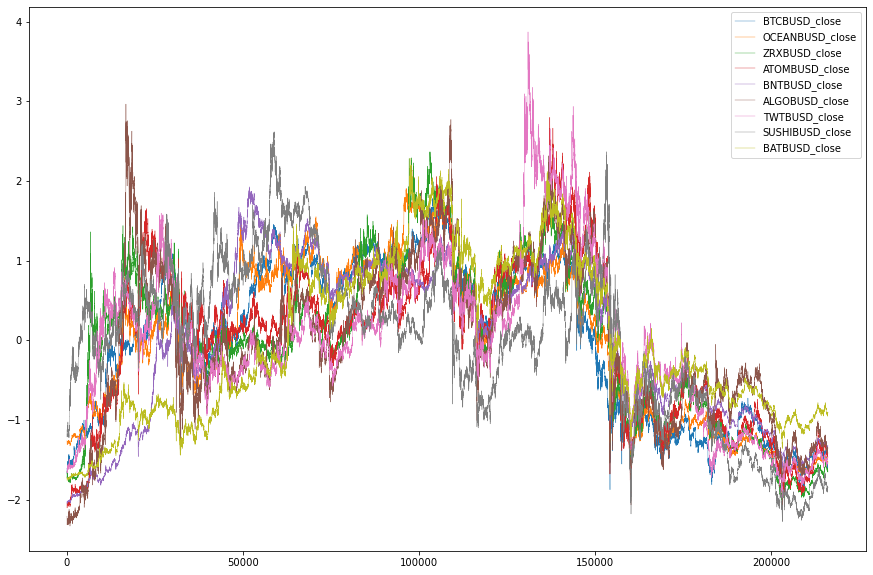

In [68]:
scaled_binance = pd.DataFrame(scaler_d.fit_transform(main_df),columns = main_df.columns)
scaled_binance.plot(linewidth=0.4)

<AxesSubplot:>

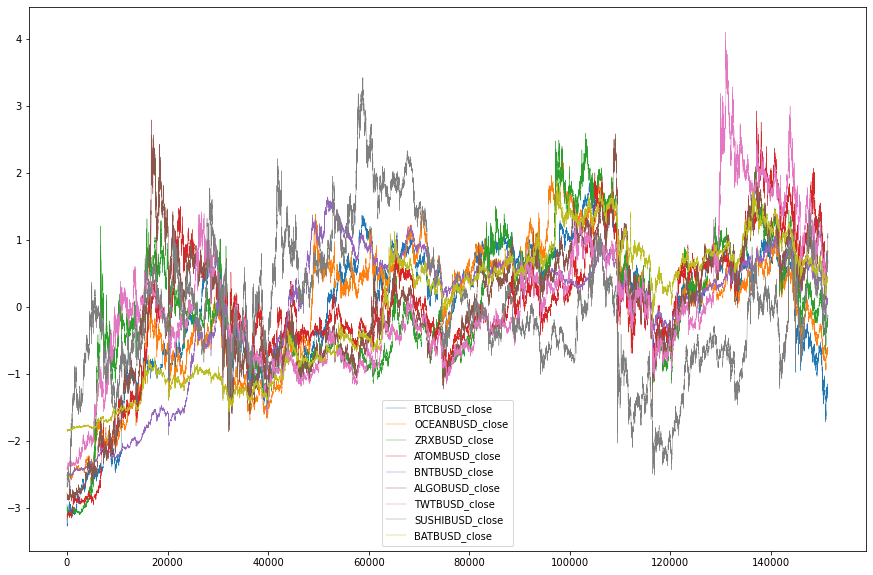

In [69]:
train_df_d_correct.plot(linewidth=0.4)

<AxesSubplot:>

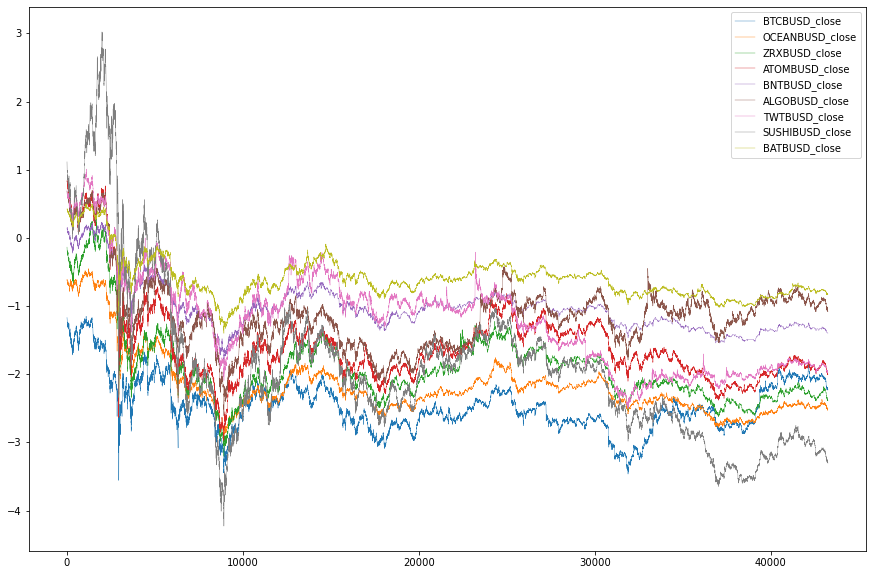

In [70]:
val_df_d_correct.plot(linewidth=0.4)

<AxesSubplot:>

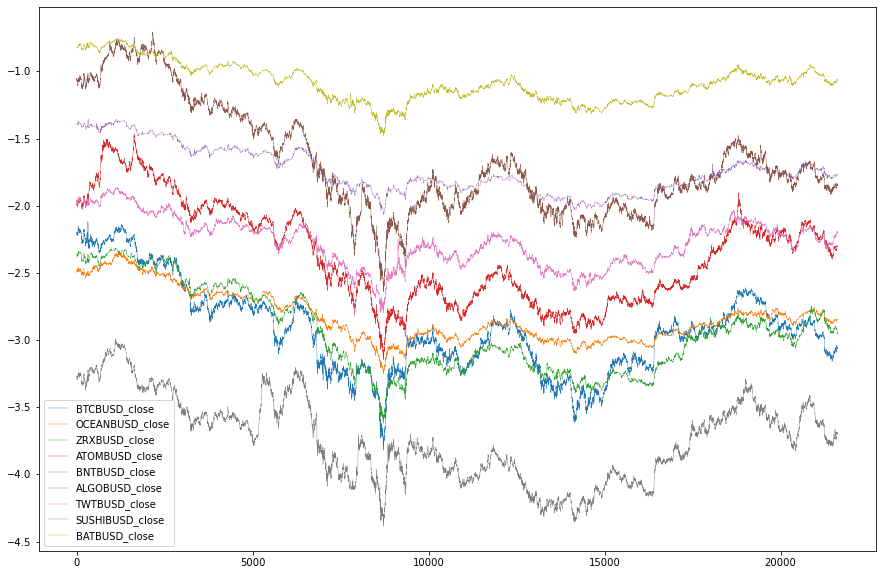

In [71]:
test_df_d_correct.plot(linewidth=0.4)

<AxesSubplot:>

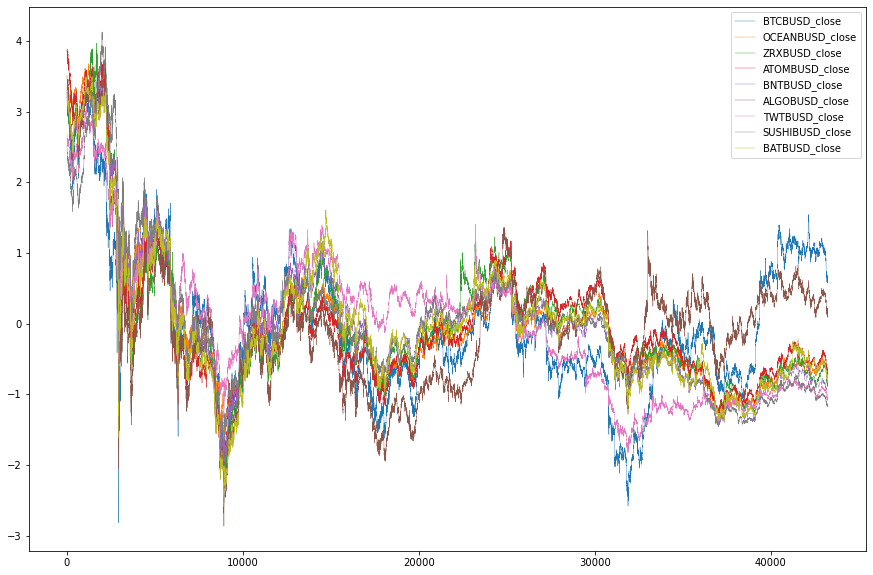

In [72]:
val_df_d = pd.DataFrame(scaler_d.fit_transform(val_df_d),columns = val_df_d.columns)

val_df_d.plot(linewidth=0.4)

<AxesSubplot:>

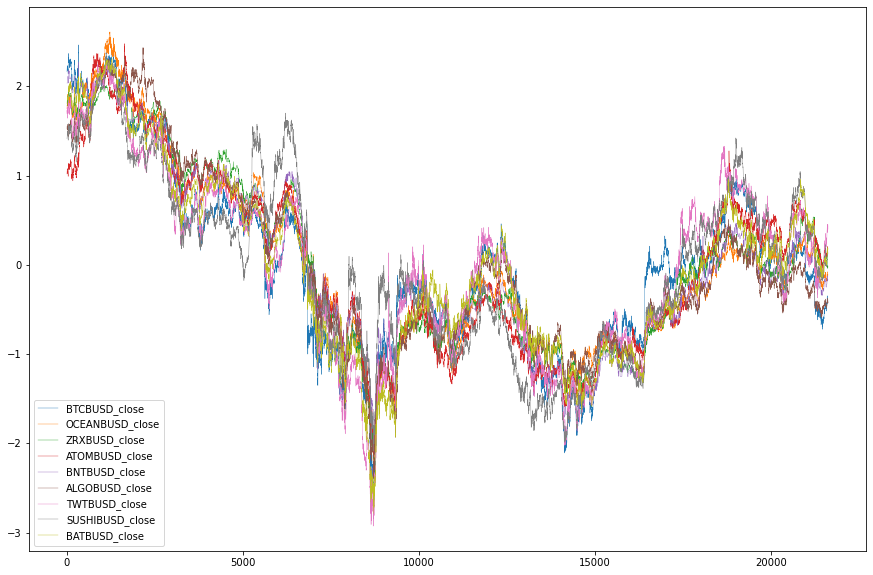

In [73]:
test_df_d = pd.DataFrame(scaler_d.fit_transform(test_df_d),columns = test_df_d.columns)

test_df_d.plot(linewidth=0.4)

<AxesSubplot:>

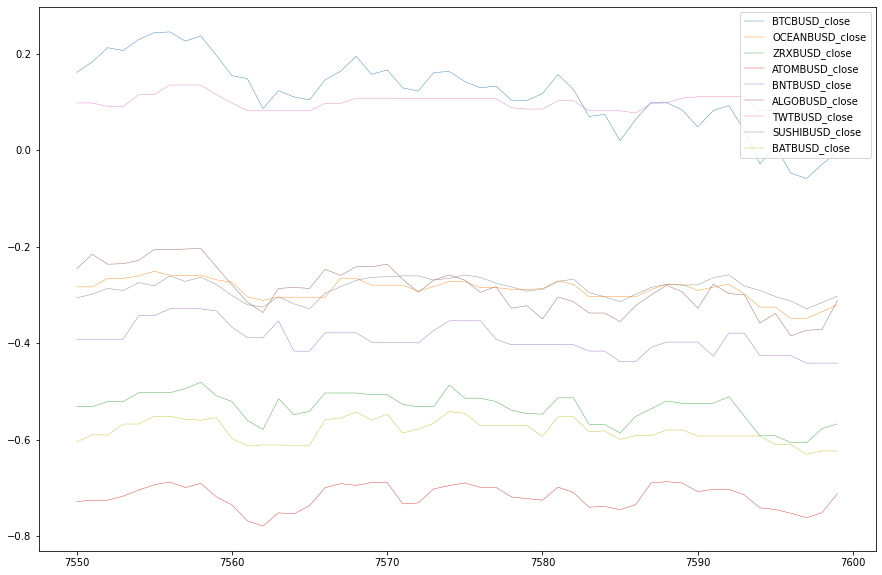

In [74]:
val_df_d[7550:7600].plot(linewidth=0.4)

### Exploring datasets

Lets plot datasets  

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

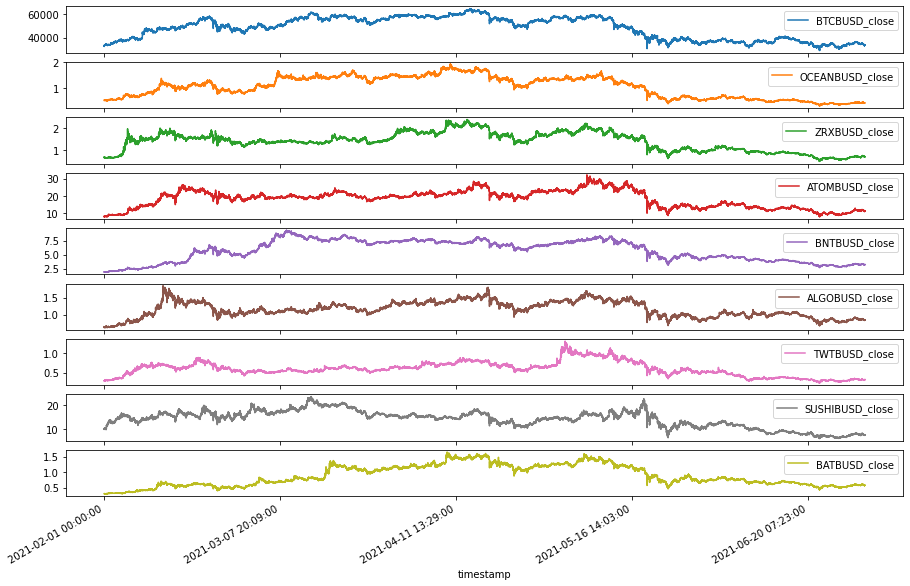

In [75]:
main_df.plot(subplots=True)

Smaller resolution. This is quite interesting. 

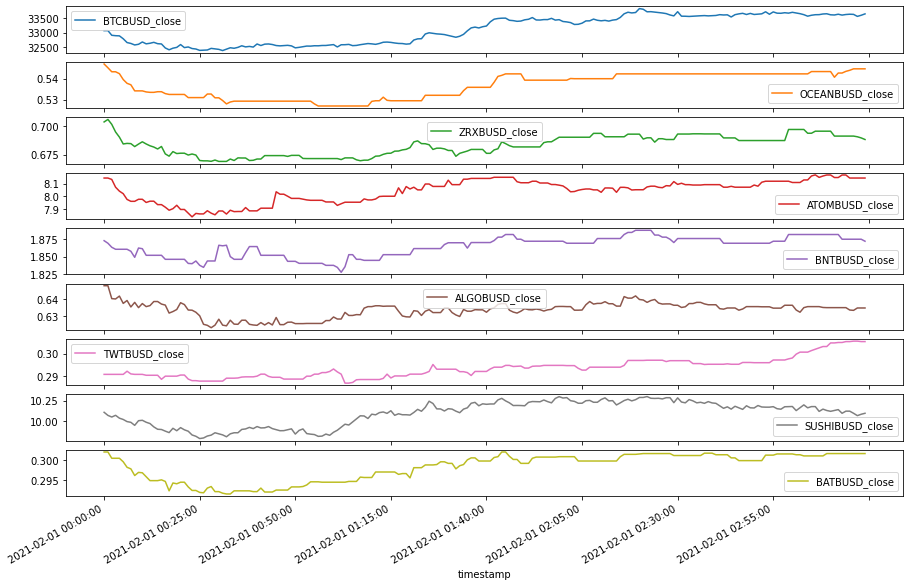

In [76]:
main_df[:200].plot(subplots=True)
plt.show()

Data is not quite good at the beginning that why I will remove some part of it 

There is a strong realtion between prices

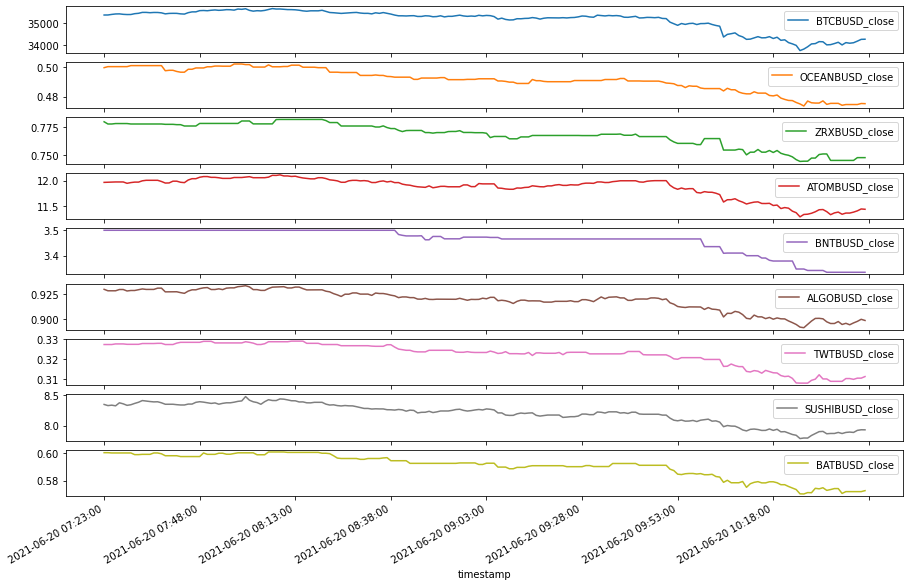

In [117]:
main_df[200000:200200].plot(subplots=True)
plt.show()

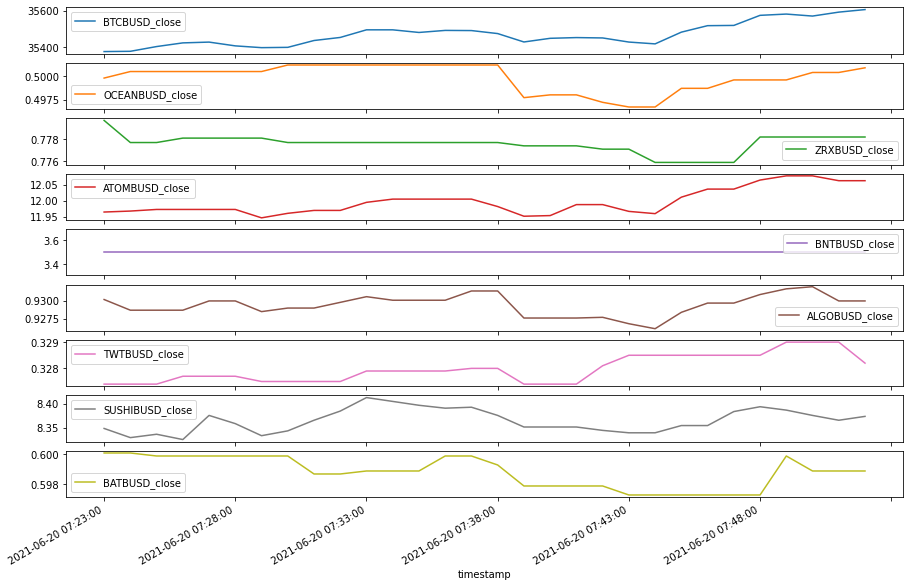

In [116]:
main_df[200000:200030].plot(subplots=True)
plt.show()

## Preprocessing

scaling values

In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
quantile = QuantileTransformer()
power = PowerTransformer()


### Percentage change

In [80]:
binance_df_percentage = main_df.pct_change()

In [81]:
binance_df_percentage

BTCBUSD_close  OCEANBUSD_close  ZRXBUSD_close  \
timestamp                                                            
2021-02-01 00:00:00            NaN              NaN            NaN   
2021-02-01 00:01:00       0.000037        -0.003291       0.003126   
2021-02-01 00:02:00      -0.004829        -0.003485      -0.006092   
2021-02-01 00:03:00      -0.000427         0.000000      -0.009550   
2021-02-01 00:04:00      -0.000171        -0.001657      -0.006476   
...                            ...              ...            ...   
2021-07-01 12:55:00      -0.000703         0.000000      -0.002696   
2021-07-01 12:56:00       0.000624         0.000000      -0.000285   
2021-07-01 12:57:00       0.001772         0.003181       0.004127   
2021-07-01 12:58:00      -0.002078         0.000000      -0.002409   
2021-07-01 12:59:00      -0.000507         0.000000       0.000000   

                     ATOMBUSD_close  BNTBUSD_close  ALGOBUSD_close  \
timestamp                                                            
2021-02-01 00:00:00             NaN            NaN             NaN   
2021-02-01 00:01:00        0.000000      -0.001975        0.000000   
2021-02-01 00:02:00       -0.001351      -0.003102       -0.011732   
2021-02-01 00:03:00       -0.007501      -0.001556       -0.000312   
2021-02-01 00:04:00       -0.003841       0.000000        0.002656   
...                             ...            ...             ...   
2021-07-01 12:55:00        0.000000       0.000000        0.000000   
2021-07-01 12:56:00       -0.001066       0.001913       -0.000591   
2021-07-01 12:57:00        0.000800       0.000000        0.001183   
2021-07-01 12:58:00       -0.000622       0.000000       -0.002718   
2021-07-01 12:59:00       -0.000711       0.000000        0.000000   

                     TWTBUSD_close  SUSHIBUSD_close  BATBUSD_close  
timestamp                                                           
2021-02-01 00:00:00            NaN              NaN            NaN  
2021-02-01 00:01:00       0.000000        -0.003759       0.000000  
2021-02-01 00:02:00       0.000000        -0.001986      -0.005296  
2021-02-01 00:03:00       0.000000         0.002090       0.000000  
2021-02-01 00:04:00       0.000000        -0.003475       0.000000  
...                            ...              ...            ...  
2021-07-01 12:55:00       0.000928        -0.001987      -0.002079  
2021-07-01 12:56:00       0.000000        -0.000664      -0.001042  
2021-07-01 12:57:00       0.002164         0.003453       0.005910  
2021-07-01 12:58:00      -0.004935        -0.002250      -0.003456  
2021-07-01 12:59:00       0.003720         0.000000       0.002774  

[216177 rows x 9 columns]

In [82]:
binance_df_percentage.describe()

BTCBUSD_close  OCEANBUSD_close  ZRXBUSD_close  ATOMBUSD_close  \
count  216176.000000    216176.000000  216176.000000   216176.000000   
mean        0.000001         0.000003       0.000005        0.000006   
std         0.001467         0.002896       0.003096        0.002985   
min        -0.045080        -0.115670      -0.066752       -0.088364   
25%        -0.000676        -0.000607      -0.000544       -0.001360   
50%        -0.000001         0.000000       0.000000        0.000000   
75%         0.000665         0.000691       0.000580        0.001380   
max         0.049759         0.119092       0.183098        0.084452   

       BNTBUSD_close  ALGOBUSD_close  TWTBUSD_close  SUSHIBUSD_close  \
count  216176.000000   216176.000000  216176.000000    216176.000000   
mean        0.000005        0.000005       0.000007         0.000003   
std         0.002306        0.002860       0.003519         0.002870   
min        -0.058223       -0.054610      -0.073259        -0.123138   
25%         0.000000       -0.001307      -0.000536        -0.001244   
50%         0.000000        0.000000       0.000000         0.000000   
75%         0.000000        0.001346       0.000588         0.001249   
max         0.057126        0.119777       0.104014         0.152571   

       BATBUSD_close  
count  216176.000000  
mean        0.000007  
std         0.002806  
min        -0.052667  
25%        -0.000989  
50%         0.000000  
75%         0.001030  
max         0.043423

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

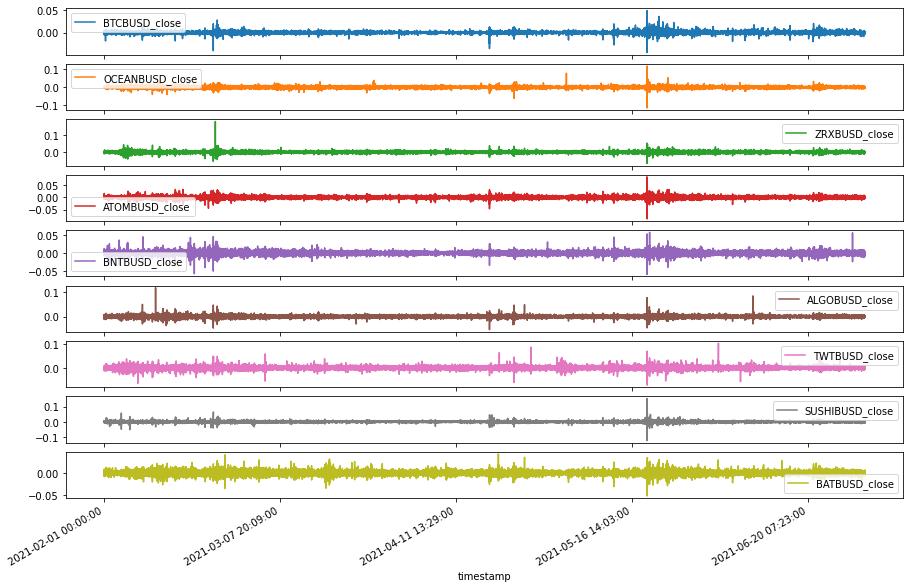

In [83]:
binance_df_percentage.plot(subplots=True)

<AxesSubplot:xlabel='timestamp'>

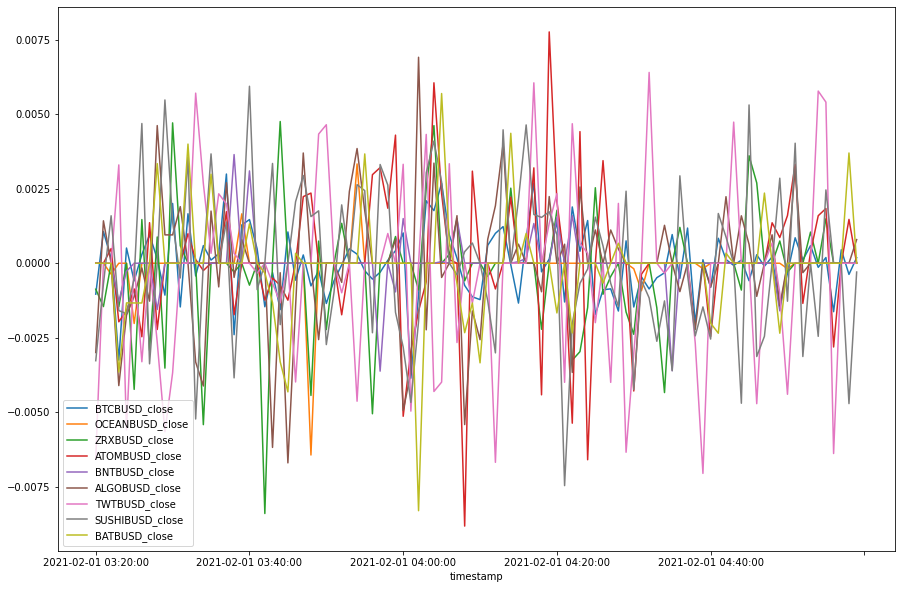

In [84]:
binance_df_percentage[200:300].plot()

In [85]:
scaled_bin_percentage_df_min_max = pd.DataFrame(min_max_scaler.fit_transform(binance_df_percentage),columns = binance_df_percentage.columns)

<AxesSubplot:>

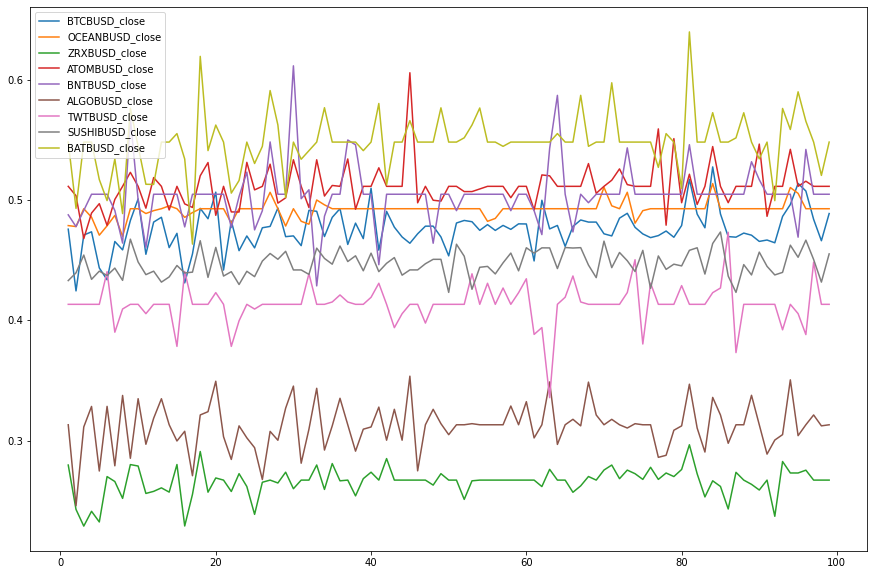

In [86]:
scaled_bin_percentage_df_min_max[:100].plot()

In [87]:
scaled_bin_percentage_df_min_max.describe()

BTCBUSD_close  OCEANBUSD_close  ZRXBUSD_close  ATOMBUSD_close  \
count  216176.000000    216176.000000  216176.000000   216176.000000   
mean        0.475344         0.492726       0.267187        0.511351   
std         0.015472         0.012336       0.012393        0.017273   
min         0.000000         0.000000       0.000000        0.000000   
25%         0.468209         0.490126       0.264988        0.503444   
50%         0.475320         0.492712       0.267167        0.511317   
75%         0.482344         0.495654       0.269488        0.519302   
max         1.000000         1.000000       1.000000        1.000000   

       BNTBUSD_close  ALGOBUSD_close  TWTBUSD_close  SUSHIBUSD_close  \
count  216176.000000   216176.000000  216176.000000    216176.000000   
mean        0.504797        0.313184       0.413292         0.446632   
std         0.019989        0.016402       0.019852         0.010411   
min         0.000000        0.000000       0.000000         0.000000   
25%         0.504753        0.305657       0.410231         0.442109   
50%         0.504753        0.313154       0.413255         0.446622   
75%         0.504753        0.320872       0.416573         0.451152   
max         1.000000        1.000000       1.000000         1.000000   

       BATBUSD_close  
count  216176.000000  
mean        0.548171  
std         0.029202  
min         0.000000  
25%         0.537811  
50%         0.548099  
75%         0.558819  
max         1.000000

#### Min max

In [88]:
scaled_bin_df_min_max = pd.DataFrame(min_max_scaler.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

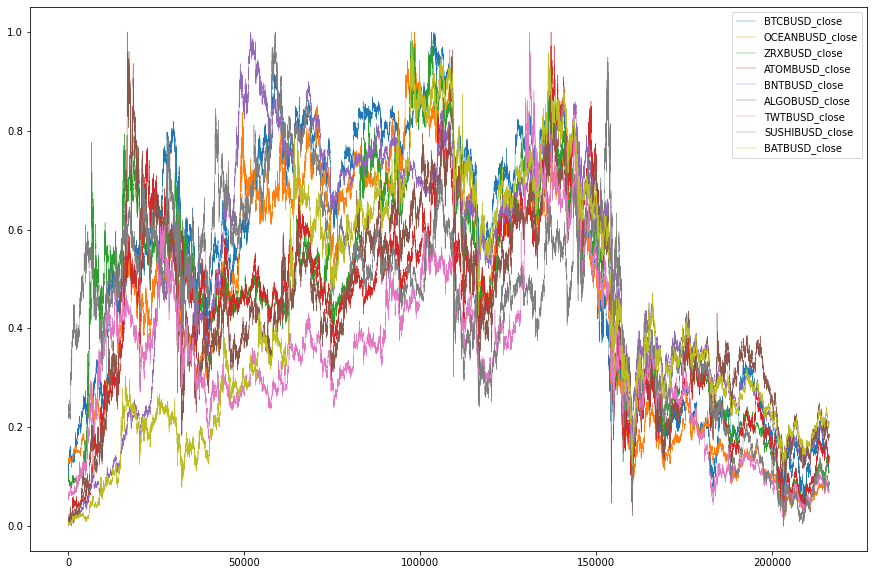

In [89]:
scaled_bin_df_min_max.plot(linewidth=0.4)

#### Z-score

In [90]:
scaled_bin_df_z_score = pd.DataFrame(standard_scaler.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

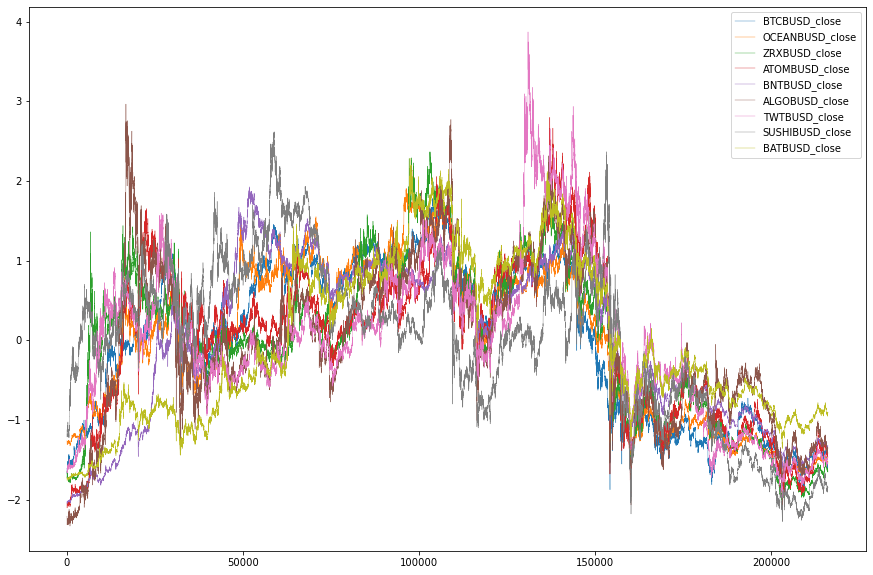

In [91]:
scaled_bin_df_z_score.plot(linewidth=0.4)

<AxesSubplot:>

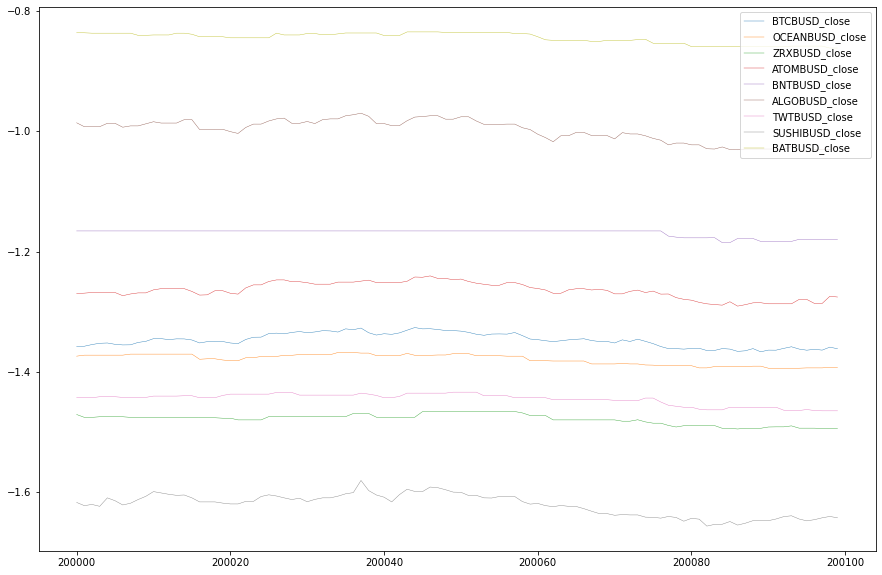

In [118]:
scaled_bin_df_z_score[200000:200100].plot(linewidth=0.4)

#### robust_scaler

In [93]:
scaled_bin_df_robust = pd.DataFrame(robust_scaler.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

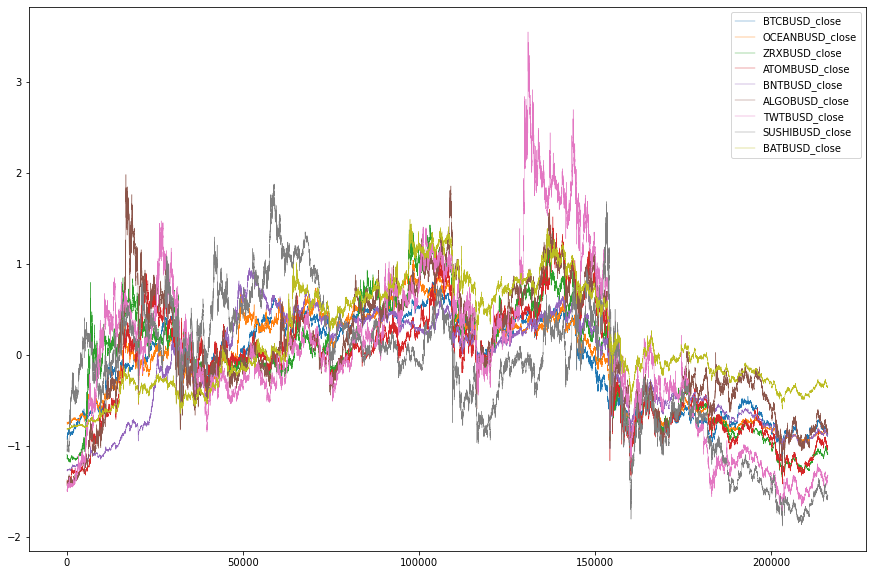

In [94]:
scaled_bin_df_robust.plot(linewidth=0.4)

Another option

In [95]:
robust_scaler_option1 = RobustScaler(quantile_range = (49,51))

In [96]:
scaled_bin_df_robust_option1 = pd.DataFrame(robust_scaler_option1.fit_transform(main_df),columns = main_df.columns)

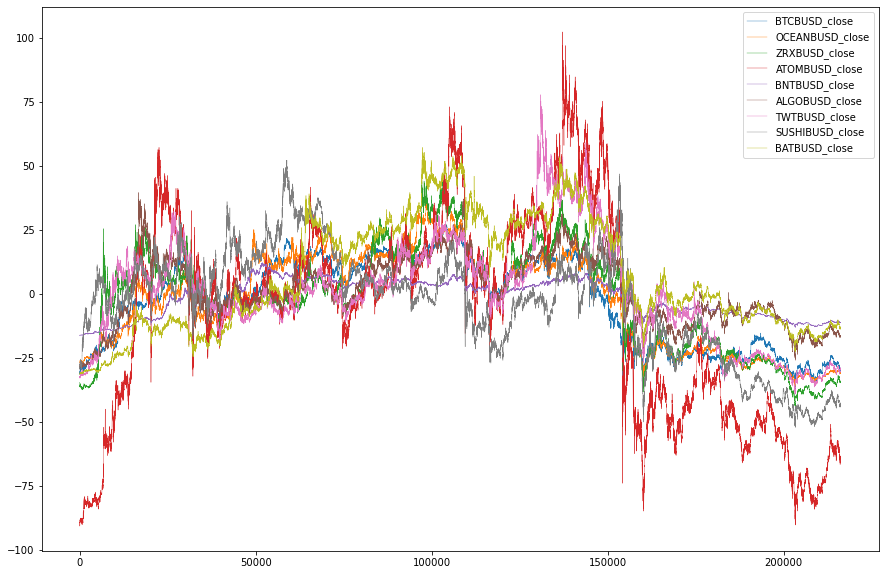

In [97]:
scaled_bin_df_robust_option1.plot(linewidth=0.4)
plt.show()

#### Quantile

In [98]:
scaled_bin_df_quantile = pd.DataFrame(quantile.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

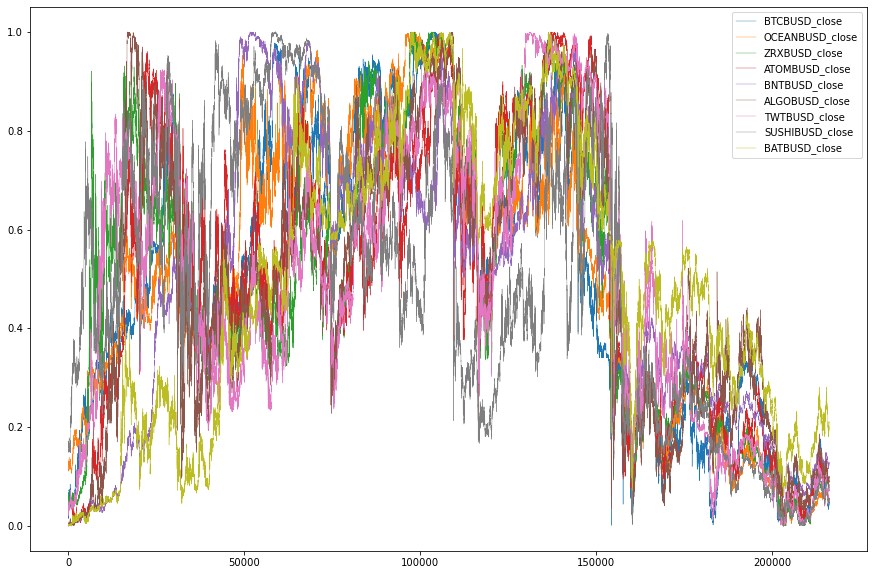

In [99]:
scaled_bin_df_quantile.plot(linewidth=0.4)

### Log scaling

In [100]:
binance_log_df = np.log(main_df)

<AxesSubplot:xlabel='timestamp'>

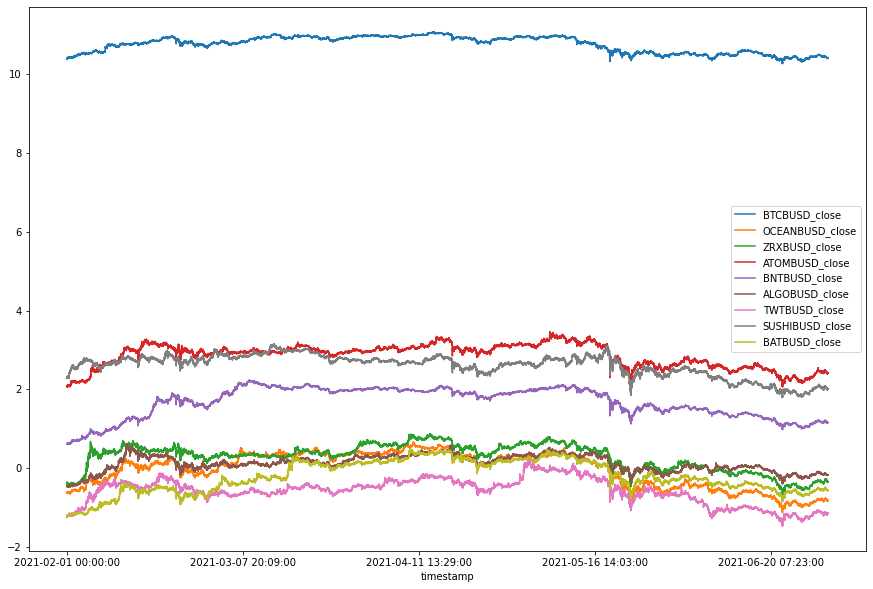

In [101]:
binance_log_df.plot()

In [102]:
scaled_log_df_min_max = pd.DataFrame(standard_scaler.fit_transform(binance_log_df),columns = main_df.columns)

In [103]:
scaled_df_min_max = pd.DataFrame(standard_scaler.fit_transform(main_df),columns = main_df.columns)

<AxesSubplot:>

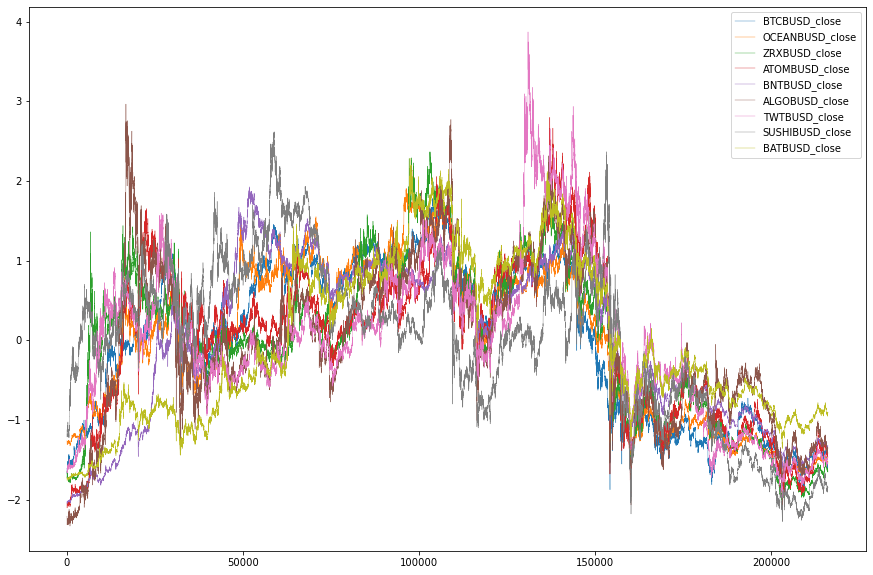

In [104]:
scaled_df_min_max.plot(linewidth=0.4)

<AxesSubplot:>

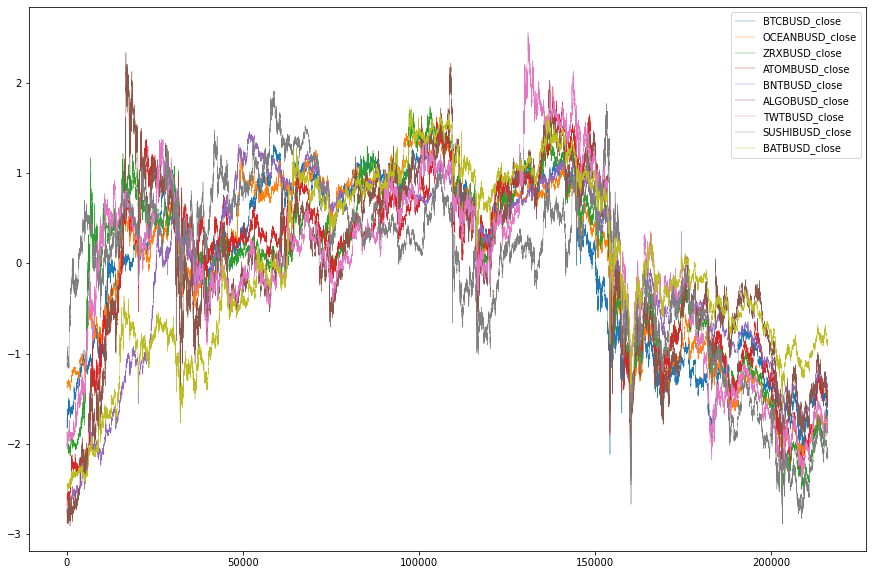

In [105]:
scaled_log_df_min_max.plot(linewidth=0.4)

### More smaller learning datasets

<AxesSubplot:xlabel='timestamp'>

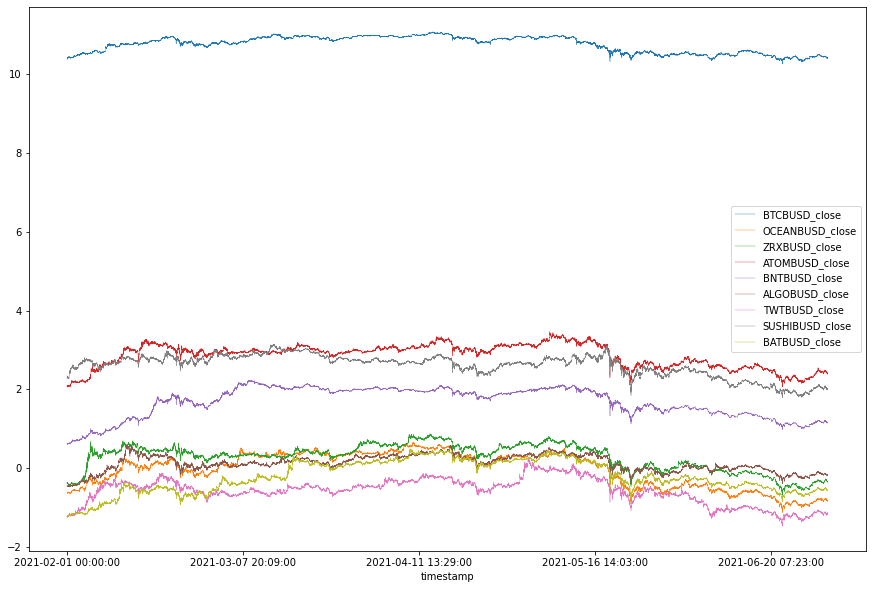

In [106]:
binance_log_df.plot(linewidth=0.4)

<AxesSubplot:xlabel='timestamp'>

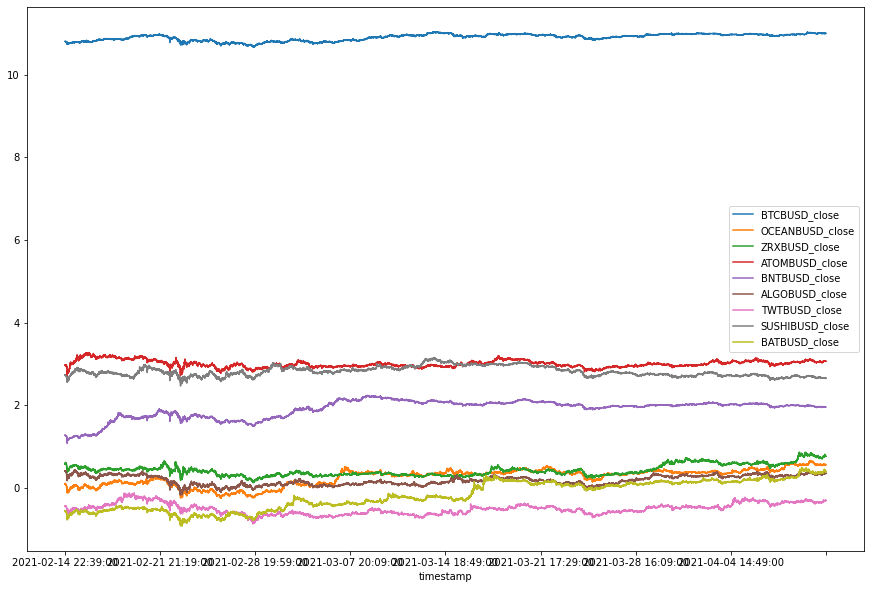

In [107]:
binance_log_df[20000:100000].plot()

In [108]:
binance_train_df_1 = pd.DataFrame(standard_scaler.fit_transform(main_df[30000:70000]),columns = main_df.columns)

<AxesSubplot:>

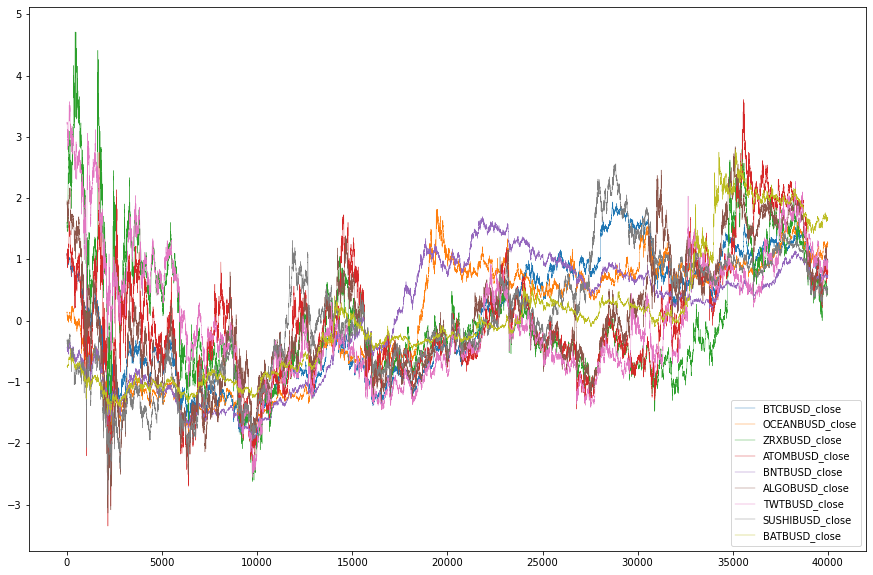

In [109]:
binance_train_df_1.plot(linewidth=0.4)

In [110]:
binance_train_df_log_1 = pd.DataFrame(standard_scaler.fit_transform(binance_log_df[30000:70000]),columns = main_df.columns)

<AxesSubplot:>

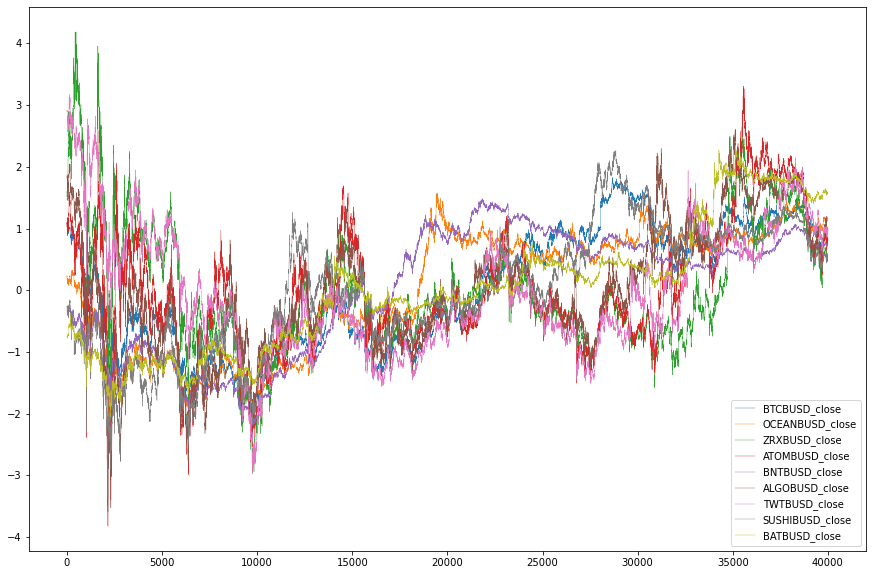

In [111]:
binance_train_df_log_1.plot(linewidth=0.4)

## Scale individually 

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

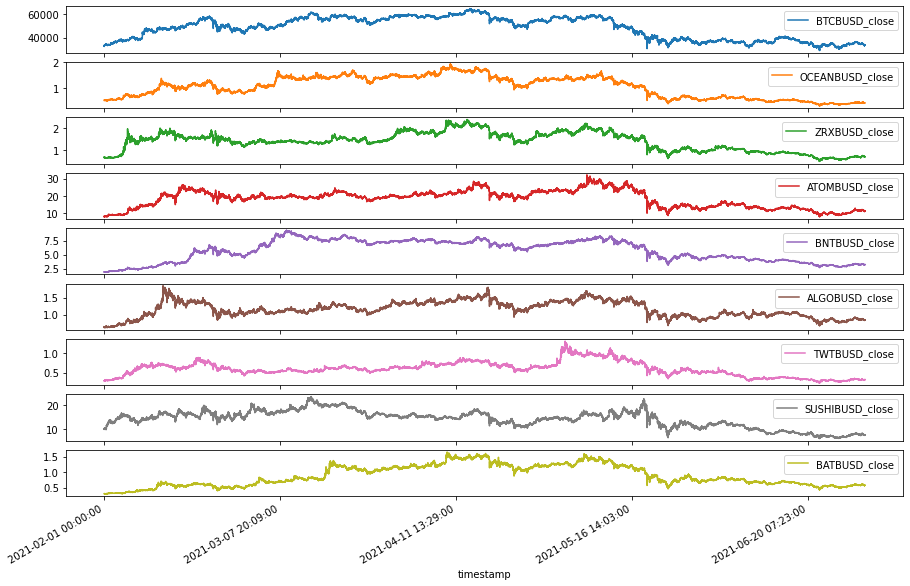

In [112]:
main_df.plot(subplots=True)

In [113]:
main_df.columns

Index(['BTCBUSD_close', 'OCEANBUSD_close', 'ZRXBUSD_close', 'ATOMBUSD_close',
       'BNTBUSD_close', 'ALGOBUSD_close', 'TWTBUSD_close', 'SUSHIBUSD_close',
       'BATBUSD_close'],
      dtype='object')

In [114]:
independent_df = main_df.copy()

In [121]:
independent_df["BTCBUSD_close"] = independent_df["BTCBUSD_close"] / independent_df["BTCBUSD_close"].max()
independent_df["OCEANBUSD_close"] = independent_df["OCEANBUSD_close"] / independent_df["OCEANBUSD_close"].max()
independent_df["ZRXBUSD_close"] = independent_df["ZRXBUSD_close"] / independent_df["ZRXBUSD_close"].max()
independent_df["ATOMBUSD_close"] = independent_df["ATOMBUSD_close"] / independent_df["ATOMBUSD_close"].max()
independent_df["BNTBUSD_close"] = independent_df["BNTBUSD_close"] / independent_df["BNTBUSD_close"].max()
independent_df["ALGOBUSD_close"] = independent_df["ALGOBUSD_close"] / independent_df["ALGOBUSD_close"].max()
independent_df["TWTBUSD_close"] = independent_df["TWTBUSD_close"] / independent_df["TWTBUSD_close"].max()
independent_df["SUSHIBUSD_close"] = independent_df["SUSHIBUSD_close"] / independent_df["SUSHIBUSD_close"].max()
independent_df["BATBUSD_close"] = independent_df["BATBUSD_close"] / independent_df["BATBUSD_close"].max()

<AxesSubplot:xlabel='timestamp'>

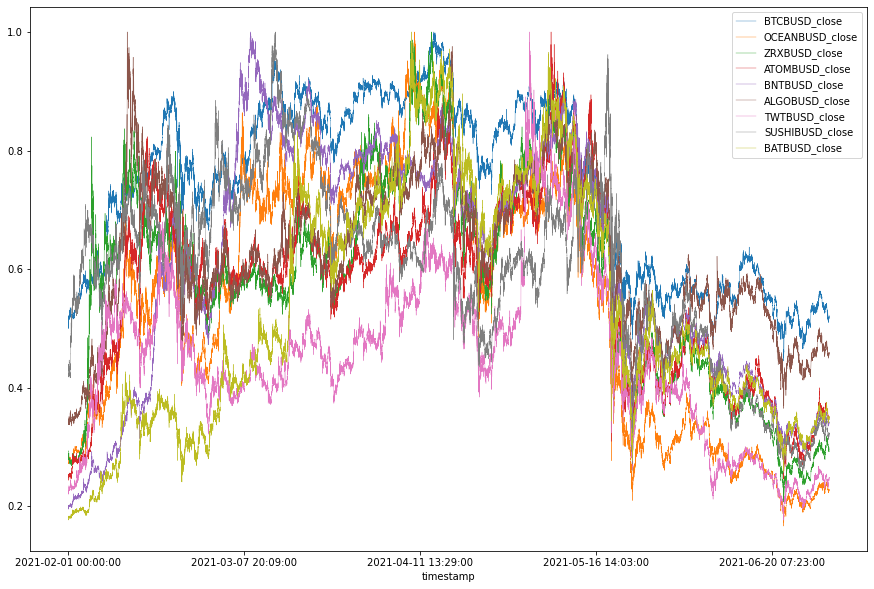

In [122]:
independent_df.plot(linewidth=0.4)

### Size equal to size of the window

In [123]:
test_part = main_df[100200:100400]

In [124]:
test_part.describe()

BTCBUSD_close  OCEANBUSD_close  ZRXBUSD_close  ATOMBUSD_close  \
count      200.00000       200.000000     200.000000      200.000000   
mean     59714.22610         1.739251       2.154559       21.704070   
std        150.76865         0.009105       0.019550        0.132157   
min      59389.64000         1.723300       2.115500       21.404000   
25%      59619.44750         1.731100       2.139000       21.609000   
50%      59745.93000         1.737950       2.159200       21.721500   
75%      59796.68500         1.748200       2.169100       21.786000   
max      60119.99000         1.761100       2.184200       21.941000   

       BNTBUSD_close  ALGOBUSD_close  TWTBUSD_close  SUSHIBUSD_close  \
count     200.000000      200.000000     200.000000       200.000000   
mean        7.104557        1.439515       0.765682        14.185810   
std         0.024962        0.012219       0.014094         0.078097   
min         7.049600        1.416000       0.737900        13.977000   
25%         7.084775        1.430400       0.754850        14.155750   
50%         7.105450        1.440300       0.770300        14.210000   
75%         7.124900        1.444425       0.777125        14.238000   
max         7.140400        1.480800       0.786600        14.291000   

       BATBUSD_close  
count     200.000000  
mean        1.465301  
std         0.009297  
min         1.446500  
25%         1.459300  
50%         1.465900  
75%         1.471525  
max         1.486300

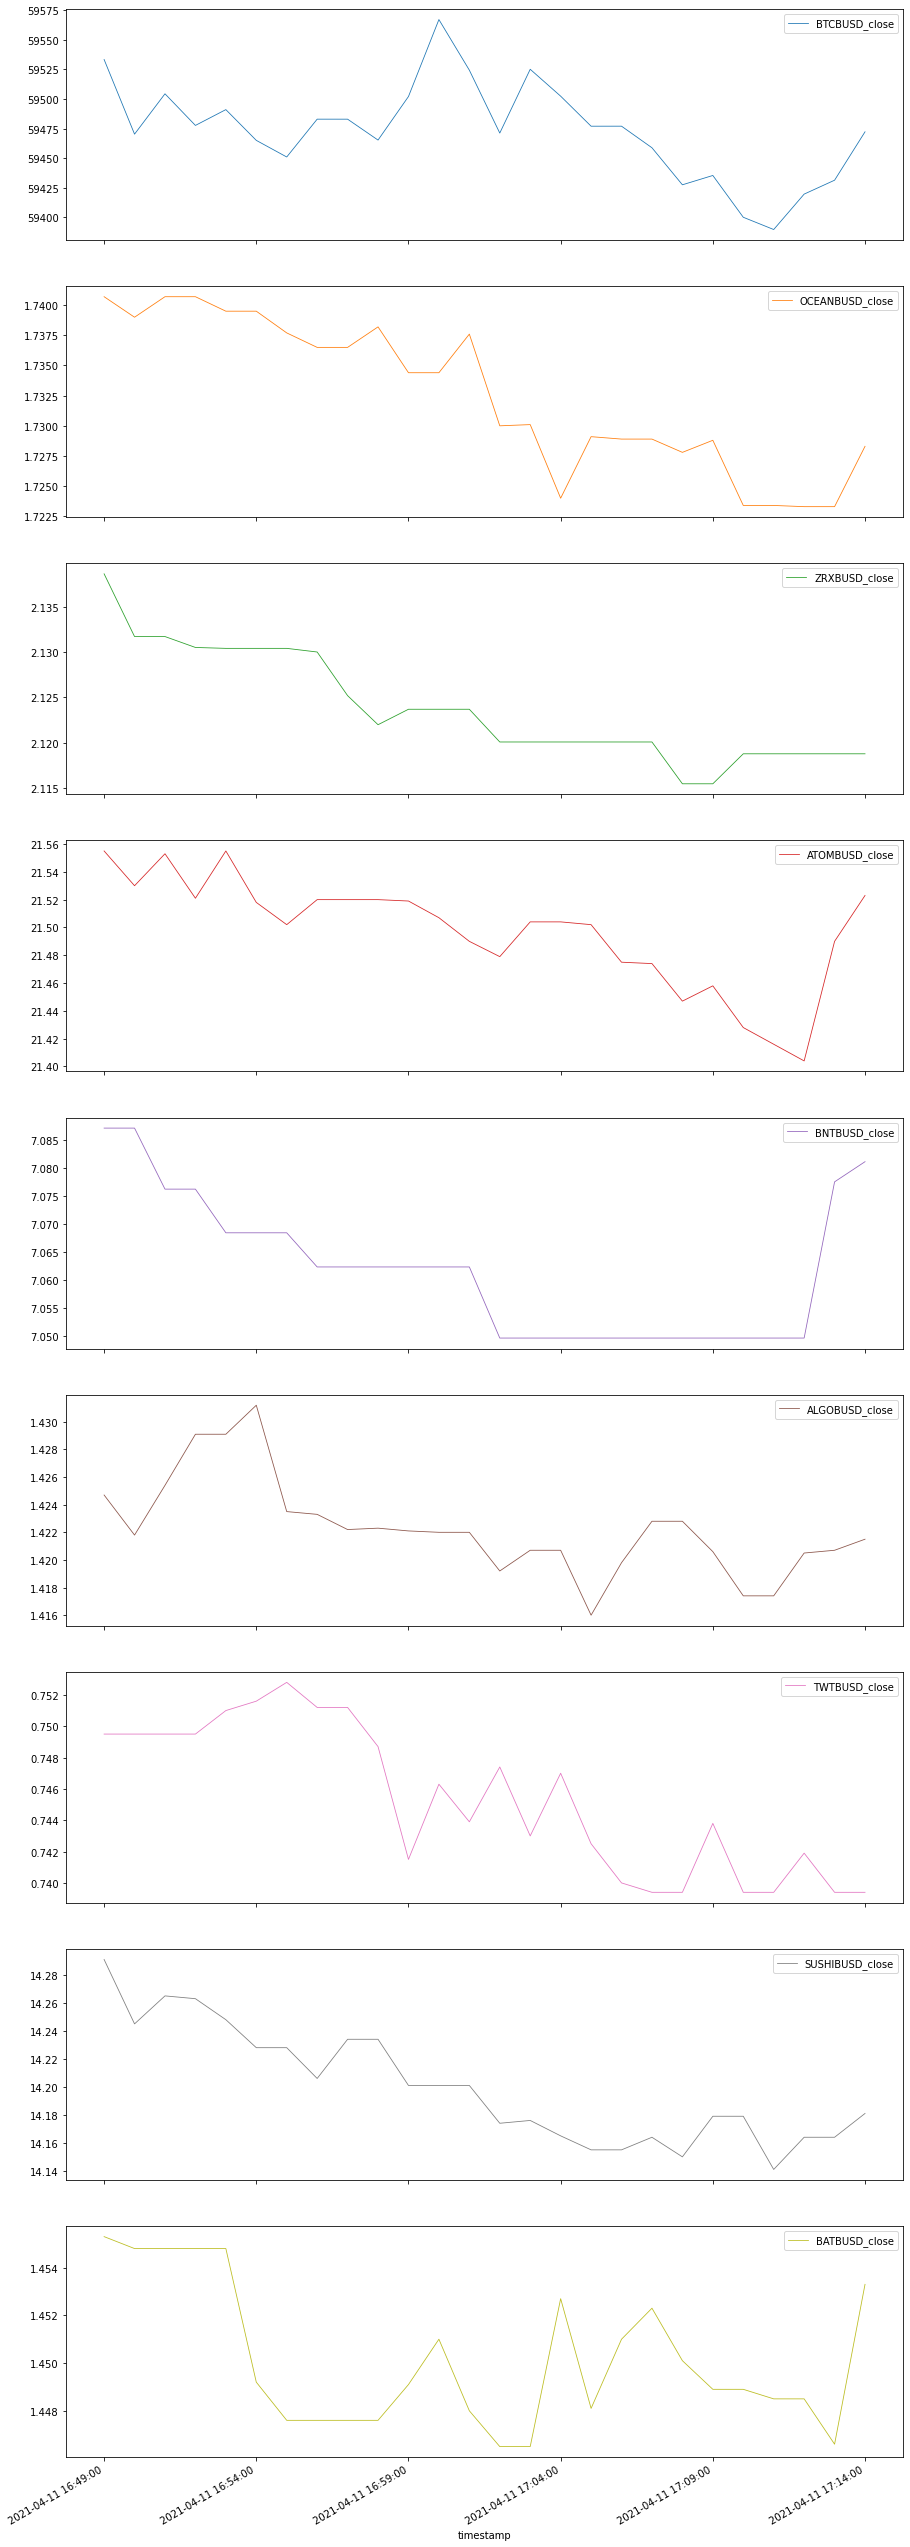

In [125]:
test_part.head(26).plot(linewidth=0.8, subplots=True, figsize=(15, 50))
plt.show()